<a href="https://colab.research.google.com/github/arnautoleg/Victoria/blob/main/Cernei_Natalia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd

In [69]:
df = pd.read_excel('/content/Cernei Baza de date (1).xlsx')

In [98]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportion_confint


def graph_cat_per (factors, outcomes):


  for el in factors:

    # Assuming df is your DataFrame with two categorical variables, 'Comportament Manager' and 'Profesia'
    # Create a contingency table
    for out in outcomes:
      contingency_table = pd.crosstab(df[out], df[el[0]])

      # Define the desired order for variables

      variable1_order = df[out].value_counts().index  # Replace with your actual category names

      # Convert variables to CategoricalDtype with specified order
      contingency_table.index = pd.Categorical(contingency_table.index, categories=variable1_order, ordered=True)


      # Sort the index and columns based on the specified order
      contingency_table.sort_index(axis=0, inplace=True)
      contingency_table.sort_index(axis=1, inplace=True)
      contingency_table

      # Perform the Chi-squared test
      chi2, p, _, _ = chi2_contingency(contingency_table)

      # Print the Chi-squared statistic and p-value
      # print(f"Chi-squared: {chi2}")
      # print(f"P-value: {p}")

      # Calculate column percentages
      col_percentages = contingency_table.div(contingency_table.sum(axis=0), axis=1) * 100

      # Create a new DataFrame for formatted annotations
      annot_data = pd.DataFrame(index=col_percentages.index, columns=col_percentages.columns)
      for i in range(contingency_table.shape[0]):
         for j in range(contingency_table.shape[1]):
             annot_data.iloc[i, j] = f"{col_percentages.iloc[i, j]:.1f}%"

      # Calculate exact confidence intervals for each cell
      confidence_intervals = pd.DataFrame(index=col_percentages.index, columns=col_percentages.columns)
      for i in range(contingency_table.shape[0]):
          for j in range(contingency_table.shape[1]):
             data = contingency_table.iloc[:, j].values
             ci = proportion_confint(data[i], nobs=sum(data), method='beta')
             confidence_intervals.iloc[i, j] = (ci[0] * 100, ci[1] * 100)

      # Increase the size of the plot
      plt.figure(figsize=(10, 6))

      # Plot the heatmap with formatted annotations
      sns.heatmap(col_percentages, annot=annot_data, fmt="", cmap="coolwarm")

      # Add Chi-squared statistic and p-value as text annotations
      plt.text(0.5, -0.5, f"Chi-squared: {chi2:.2f}", ha='center', va='center', fontsize=12, color='black')
      plt.text(0.5, -0.7, f"P-value: {p:.4f}", ha='center', va='center', fontsize=12, color='black')

      # Annotate each cell with exact confidence interval
      for i in range(contingency_table.shape[0]):
         for j in range(contingency_table.shape[1]):
             plt.text(j + 0.5, i + 0.8, f"CI {confidence_intervals.iloc[i, j][0]:.1f}-{confidence_intervals.iloc[i, j][1]:.1f}", ha='center', va='top', fontsize=10, color='black')



      # Rotate y-axis tick labels to a horizontal position
      plt.yticks(rotation=0)
      plt.title(f'{el[0]} versus {out}. Frecvetele relative cu 95%CI')
      plt.show()


In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.stats.proportion import proportion_confint

def bar_plot_cat (el, df):

  # Calculate percentage for each category
  percentage_data = (df[el].value_counts(normalize=True, sort=False).sort_index() * 100).reset_index()
  percentage_data.columns = [el, 'Procente']

  # Calculate confidence intervals for each category
  ci_data = df[el].value_counts().apply(lambda x: proportion_confint(x, len(df), method='wilson')).reset_index()
  ci_data.columns = [el, 'CI']

  # Unpack the tuple into separate columns for lower and upper bounds
  ci_data[['CI_Lower', 'CI_Upper']] = pd.DataFrame(ci_data['CI'].tolist(), index=ci_data.index)

  # Drop the original CI column
  ci_data = ci_data.drop(columns=['CI'])

  # Merge percentage and CI data
  merged_data = pd.merge(percentage_data, ci_data, on=el)

  # Create bar plot using seaborn
  plt.figure(figsize=(8, 6))
  sns.set(style="whitegrid")
  ax = sns.barplot(x=el, y='Procente', data=merged_data, palette="viridis")

  # Set y-axis range to be from 0 to 100
  ax.set_ylim(0, 100)


  # Add percentage and 95% confidence intervals as text annotations
  for i, row in merged_data.iterrows():
     percentage = row['Procente']
     lower_ci = row['CI_Lower'] * 100
     upper_ci = row['CI_Upper'] * 100
     if len(df[el].value_counts().index) <= 3:
      plt.text(i, percentage, f'{percentage:.1f}% [{lower_ci:.1f}, {upper_ci:.1f}]', ha='center', va='bottom', color='black')
     else:
      plt.text(i, percentage, f'{percentage:.1f}%\n [{lower_ci:.1f}, {upper_ci:.1f}]', ha='center', va='bottom', color='black')
  plt.title('Bar Plot Frecventele relative cu 95% IC')
  plt.show()


In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest

def boxplot_with_ztest(df, group_column, numeric_column):
    """
    Create a boxplot and perform a Z-test for two groups in a DataFrame.

    Parameters:
        df (DataFrame): The input DataFrame.
        group_column (str): The column containing group labels.
        numeric_column (str): The numeric column for comparison.

    Returns:
        None (displays the plot).
    """
    #group_column_ = group_column + '_'

    #print(df[group_column].value_counts().index)
    #df[group_column_] = df[group_column].replace(df[group_column].value_counts().index, [0, 1])


    print(round(df.groupby([group_column])[numeric_column].describe(), 1))

    print()

    # Create a boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=group_column, y=numeric_column, data=df)
    plt.title('Boxplot with Z-Test Results')

    # Perform Z-test
    group1 = df[df[group_column] == df[group_column].unique()[0]][numeric_column]
    group2 = df[df[group_column] == df[group_column].unique()[1]][numeric_column]
    z_stat, p_value = ztest(group1, group2, alternative='two-sided')

    # Get the maximum value in the numeric column for dynamic positioning
    max_value = max(df[numeric_column])

    # Add Z-test results as text annotation with dynamic positioning
    if p_value < 0.001:
        plt.text(0.4, max_value + 0.1 * max_value, f'Z-Test: {round(z_stat, 1)}, p-value<0.001', ha='center', va='bottom', color='black')
    else:
        plt.text(0.4, max_value + 0.1 * max_value, f'Z-Test: {round(z_stat, 1)}, p-value={p_value:.4f}', ha='center', va='bottom', color='black')

    plt.ylim(0, max_value + 0.2 * max_value)  # Adjust the ylim for better visualization
    #Show the plot

    plt.ylim(0, max(df[numeric_column])+max(df[numeric_column])*0.3)
    plt.show()


In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

def boxplot_with_mannwhitneyu(df, group_column, numeric_column):
    """
    Create a boxplot and perform a Mann-Whitney U test for two groups in a DataFrame.

    Parameters:
        df (DataFrame): The input DataFrame.
        group_column (str): The column containing group labels.
        numeric_column (str): The numeric column for comparison.

    Returns:
        None (displays the plot).
    """
    print(round(df.groupby([group_column])[numeric_column].describe(), 1))
    print()

    # Remove NaN values for each group
    group1 = df[df[group_column] == df[group_column].unique()[0]][numeric_column].dropna()
    group2 = df[df[group_column] == df[group_column].unique()[1]][numeric_column].dropna()

    # Create a boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=group_column, y=numeric_column, data=df)
    plt.title('Boxplot with Mann-Whitney U Test Results')

    # Perform Mann-Whitney U test
    stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')

    # Get the maximum value in the numeric column for dynamic positioning
    max_value = max(df[numeric_column])

    # Add Mann-Whitney U test results as text annotation with dynamic positioning
    if p_value < 0.001:
        plt.text(0.4, max_value + 0.1 * max_value, f'Mann-Whitney U Test: p-value<0.001', ha='center', va='bottom', color='black')
    else:
        plt.text(0.4, max_value + 0.1 * max_value, f'Mann-Whitney U Test: p-value={p_value:.4f}', ha='center', va='bottom', color='black')

    plt.ylim(0, max_value + 0.2 * max_value)  # Adjust the ylim for better visualization
    plt.show()



In [72]:
df.columns

Index(['ID', 'Lotul', 'Vârsta', 'Genul', 'HTA', 'Gradul_HTA', 'DZ', 'Tipul_DZ',
       'Fibrilație_atrială', 'BPOC', 'Astm_bronșic', 'Obezitate',
       'Gradul_obezității', 'Debut_spitalizare_TI_zile', 'NIV', 'NIV_zile',
       'MV', 'MV_zile', 'Deces', 'TI_zile', 'Spital_zile', 'IO_1zi', 'IO_7zi',
       'Gravitate_IO', 'PCR_1zi', 'PCR_7zi', 'PCT_1zi', 'PCT_7zi',
       'BRIXIA_1zi', 'BRIXIA_7zi', 'Leucocitele_1zi', 'Leucitele_7zi',
       'D_Dimerii_1zi', 'D_Dimerii_7zi', 'Hepatita_cronică',
       'Evaluarea_clinică_1zi', 'Evaluarea_clinică_7zi',
       'Evaluarea_clinică_dinamica', 'Hb_1zi', 'Hb_7zi', 'Neutrofile_1zi',
       'Neutrofile_7zi', 'Limfocite_1zi', 'Limfocite_7zi', 'RNL_1zi',
       'RNL_7zi', 'Trombocite_1zi', 'Trombocite_7zi', 'Ureea_1zi',
       'Ureea_7zi'],
      dtype='object')

In [73]:
len(df.columns)

50

In [74]:
df.Deces.value_counts()

non-Deces    71
Deces        29
Name: Deces, dtype: int64

In [75]:
df.select_dtypes(include='number').columns


Index(['ID', 'Vârsta', 'Debut_spitalizare_TI_zile', 'NIV_zile', 'MV_zile',
       'TI_zile', 'Spital_zile', 'IO_1zi', 'IO_7zi', 'PCR_1zi', 'PCR_7zi',
       'PCT_1zi', 'PCT_7zi', 'BRIXIA_1zi', 'BRIXIA_7zi', 'Leucocitele_1zi',
       'Leucitele_7zi', 'D_Dimerii_1zi', 'D_Dimerii_7zi',
       'Evaluarea_clinică_1zi', 'Evaluarea_clinică_7zi', 'Hb_1zi', 'Hb_7zi',
       'Neutrofile_1zi', 'Neutrofile_7zi', 'Limfocite_1zi', 'Limfocite_7zi',
       'RNL_1zi', 'RNL_7zi', 'Trombocite_1zi', 'Trombocite_7zi', 'Ureea_1zi',
       'Ureea_7zi'],
      dtype='object')

In [76]:
df.select_dtypes(include='object').columns

Index(['Lotul', 'Genul', 'HTA', 'Gradul_HTA', 'DZ', 'Tipul_DZ',
       'Fibrilație_atrială', 'BPOC', 'Astm_bronșic', 'Obezitate',
       'Gradul_obezității', 'NIV', 'MV', 'Deces', 'Gravitate_IO',
       'Hepatita_cronică', 'Evaluarea_clinică_dinamica'],
      dtype='object')

In [79]:
df['Gradul_obezității'] = df['Gradul_obezității'].replace([0], ['non'])
df['Gradul_HTA'] = df['Gradul_HTA'].replace([0], ['non'])


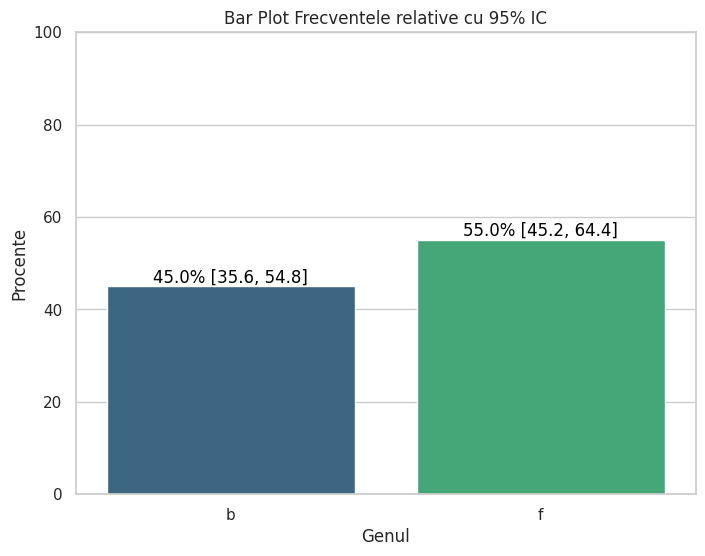

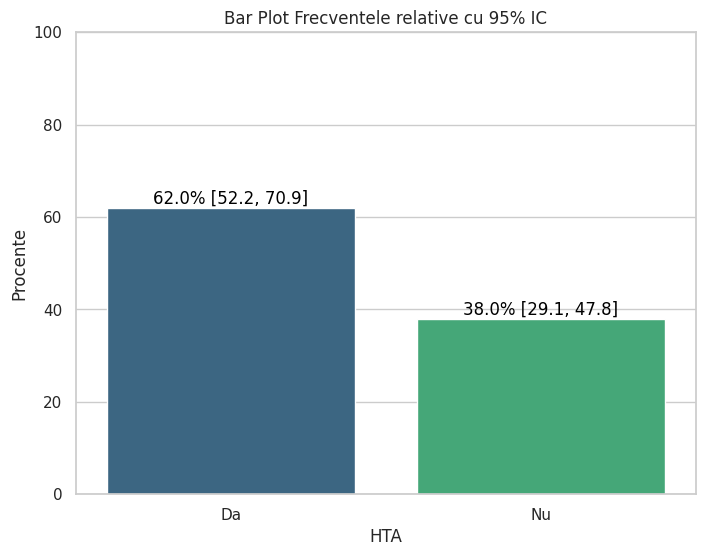

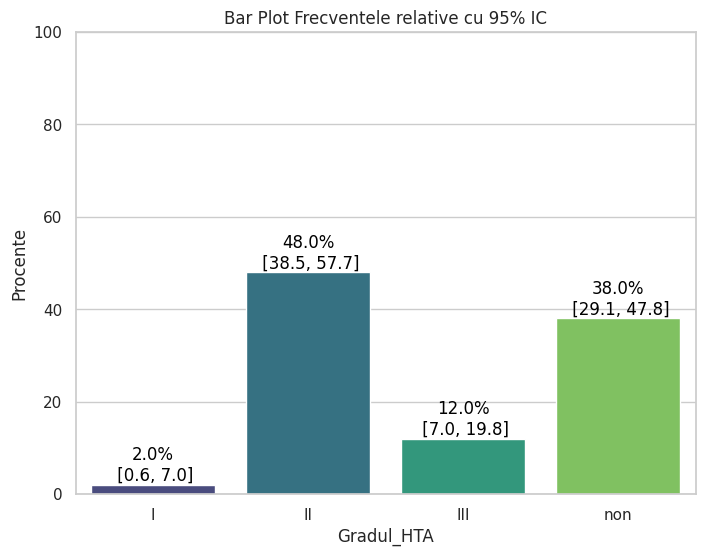

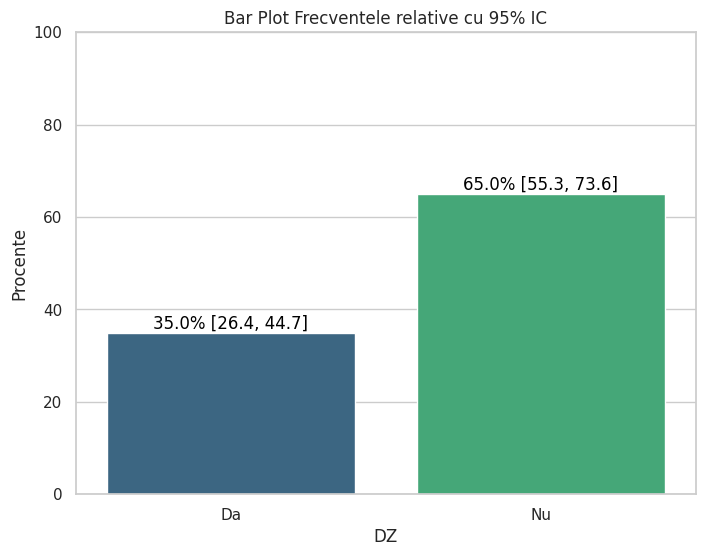

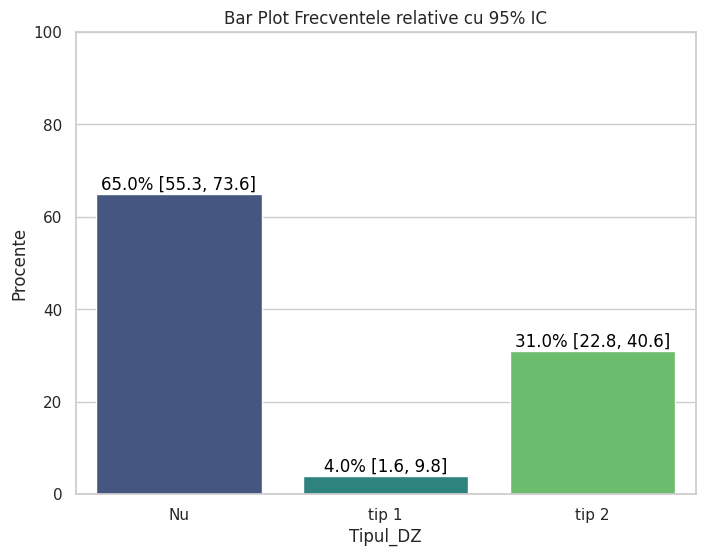

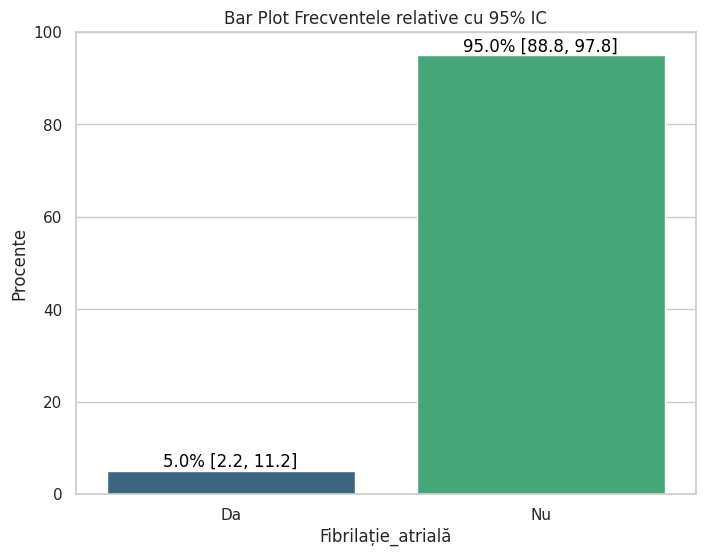

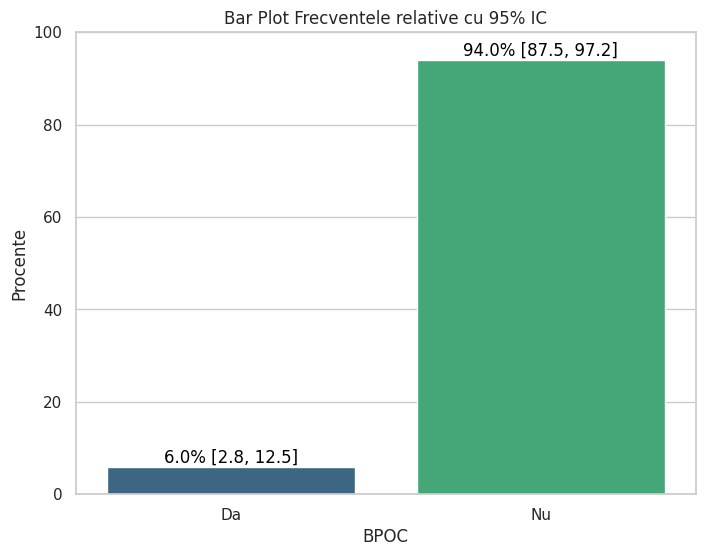

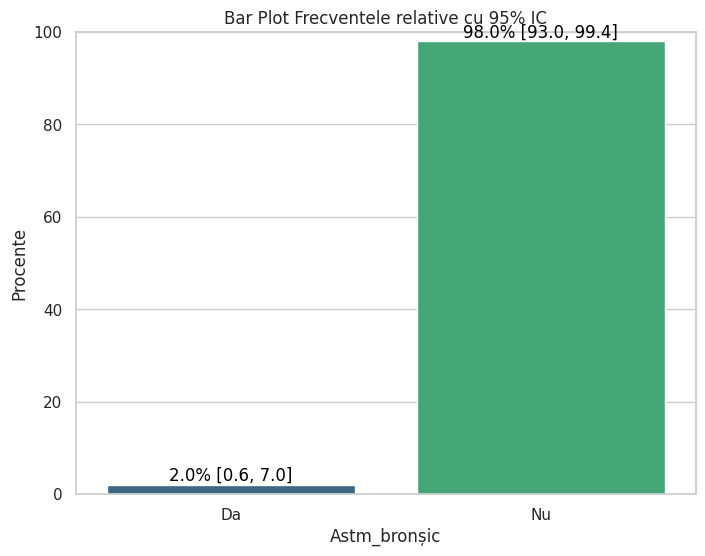

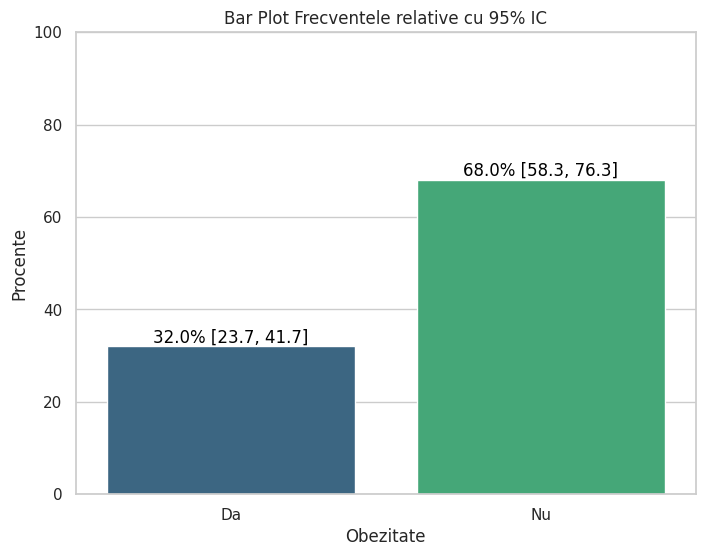

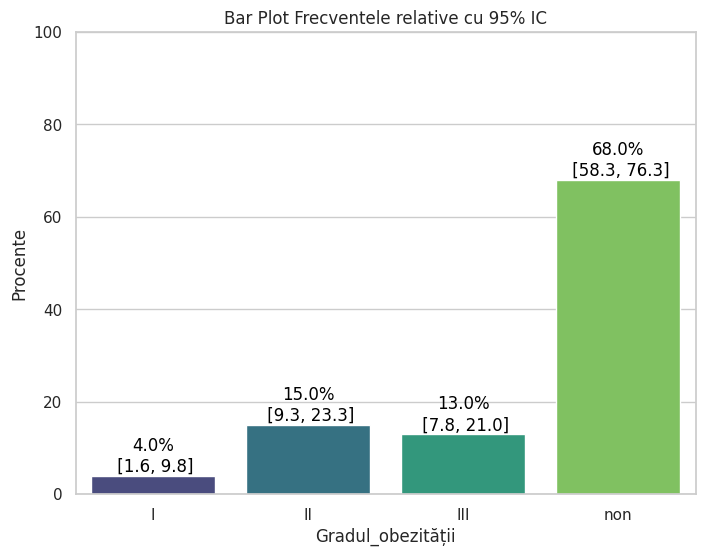

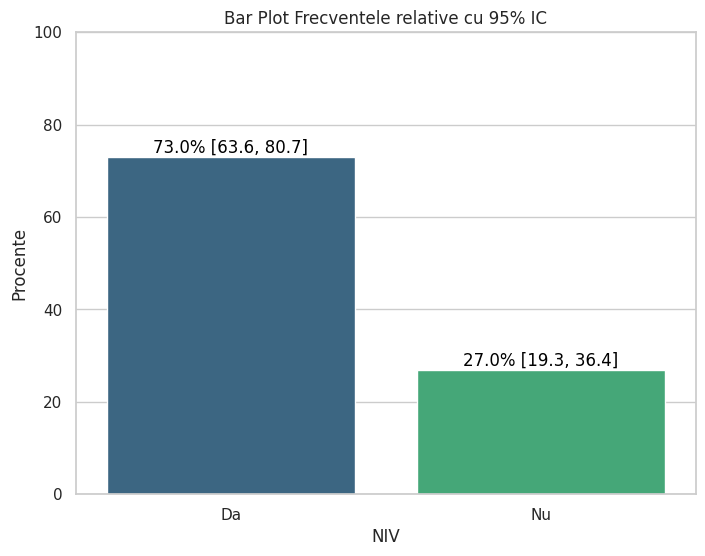

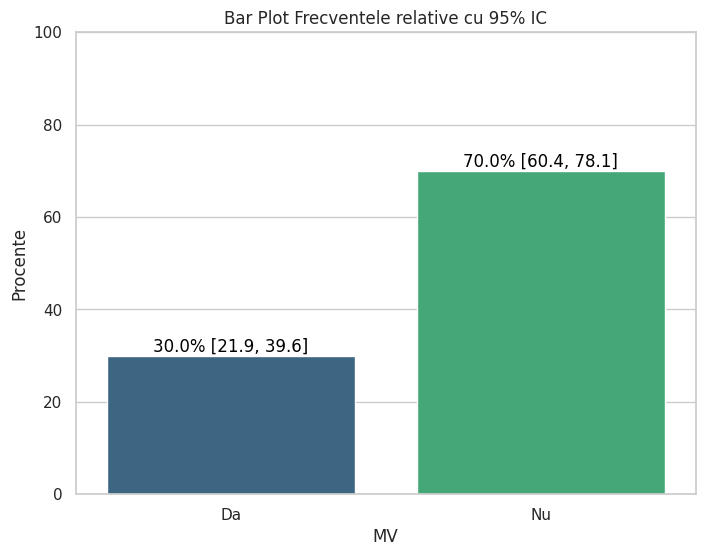

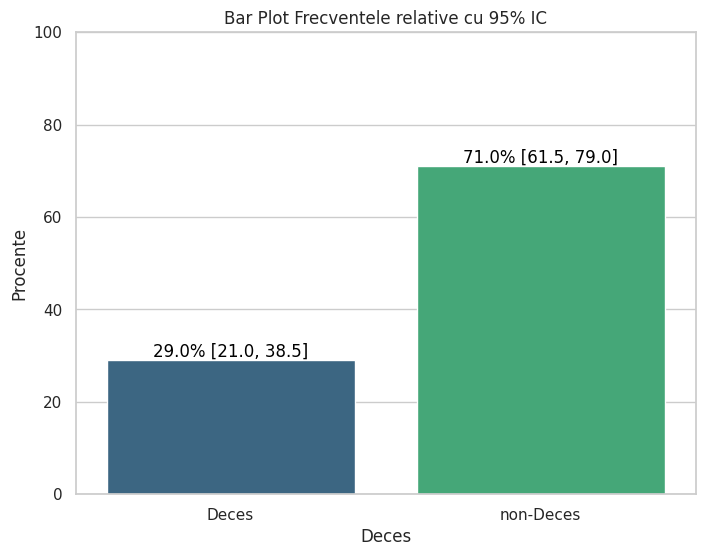

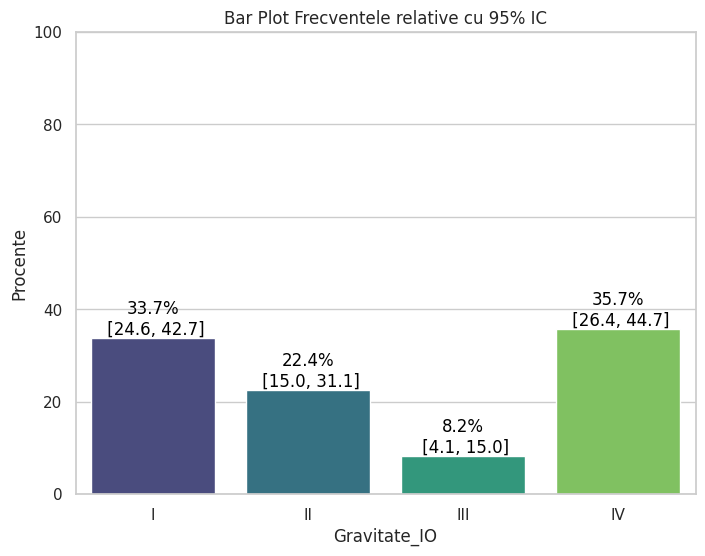

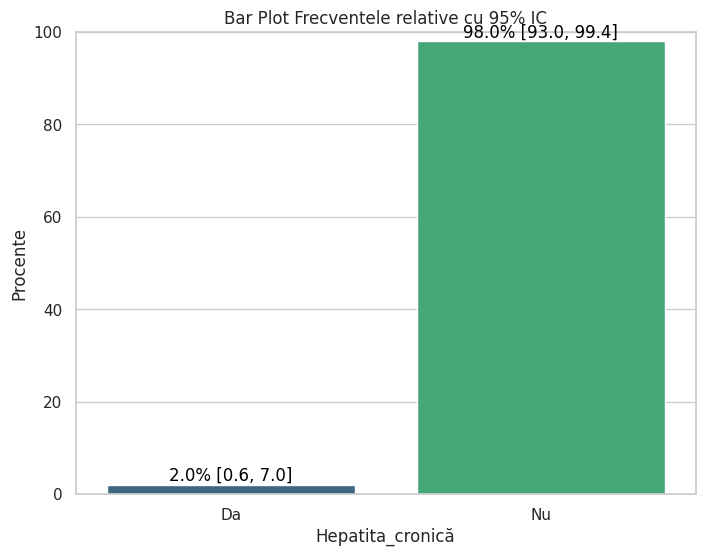

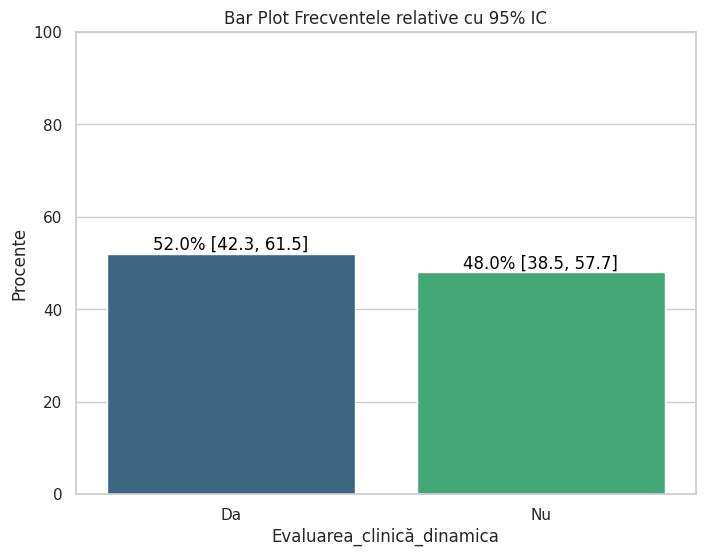

In [80]:
for el in ['Genul', 'HTA', 'Gradul_HTA', 'DZ', 'Tipul_DZ',
           'Fibrilație_atrială', 'BPOC', 'Astm_bronșic',
           'Obezitate', 'Gradul_obezității', 'NIV', 'MV', 'Deces', 'Gravitate_IO',
           'Hepatita_cronică', 'Evaluarea_clinică_dinamica']:


  bar_plot_cat (el, df)

# Numerical variables

In [95]:

for el in ['Vârsta', 'Debut_spitalizare_TI_zile', 'NIV_zile', 'MV_zile',
       'TI_zile', 'Spital_zile', 'IO_1zi', 'IO_7zi', 'PCR_1zi', 'PCR_7zi',
       'PCT_1zi', 'PCT_7zi', 'BRIXIA_1zi', 'BRIXIA_7zi', 'Leucocitele_1zi',
       'Leucitele_7zi', 'D_Dimerii_1zi', 'D_Dimerii_7zi',
       'Evaluarea_clinică_1zi', 'Evaluarea_clinică_7zi', 'Hb_1zi', 'Hb_7zi',
       'Neutrofile_1zi', 'Neutrofile_7zi', 'Limfocite_1zi', 'Limfocite_7zi',
       'RNL_1zi', 'RNL_7zi', 'Trombocite_1zi', 'Trombocite_7zi', 'Ureea_1zi',
       'Ureea_7zi']:
       print(el)
       print(round(df[el].describe(), 1))
       print(round(df.groupby(['Lotul'])[el].describe(), 1))
       print('__________________________________________')



Vârsta
count    100.0
mean      60.2
std       10.9
min       28.0
25%       54.0
50%       61.0
75%       68.2
max       84.0
Name: Vârsta, dtype: float64
          count  mean   std   min   25%   50%   75%   max
Lotul                                                    
Ozon       50.0  58.1   9.9  28.0  51.8  59.5  64.0  73.0
non-Ozon   50.0  62.4  11.6  34.0  54.2  61.5  71.0  84.0
__________________________________________
Debut_spitalizare_TI_zile
count    100.0
mean       7.4
std        4.1
min        1.0
25%        5.0
50%        7.0
75%        9.0
max       29.0
Name: Debut_spitalizare_TI_zile, dtype: float64
          count  mean  std  min  25%  50%  75%   max
Lotul                                               
Ozon       50.0   6.9  4.3  1.0  4.0  7.0  8.8  29.0
non-Ozon   50.0   7.9  3.8  1.0  6.0  7.0  9.0  24.0
__________________________________________
NIV_zile
count    100.0
mean       4.5
std        5.5
min        0.0
25%        0.0
50%        3.0
75%        7.0
max   

In [ ]:
#boxplot_with_ztest(df, group_column, numeric_column)

          count  mean   std   min   25%   50%   75%   max
Lotul                                                    
Ozon       50.0  58.1   9.9  28.0  51.8  59.5  64.0  73.0
non-Ozon   50.0  62.4  11.6  34.0  54.2  61.5  71.0  84.0



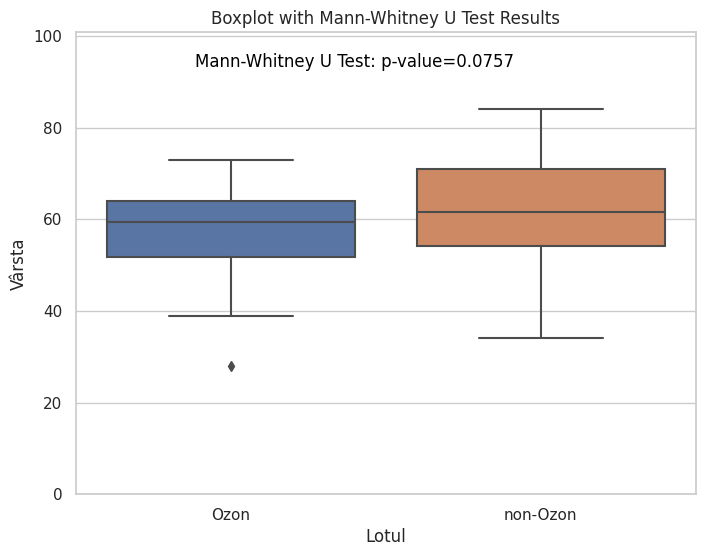

          count  mean  std  min  25%  50%  75%   max
Lotul                                               
Ozon       50.0   6.9  4.3  1.0  4.0  7.0  8.8  29.0
non-Ozon   50.0   7.9  3.8  1.0  6.0  7.0  9.0  24.0



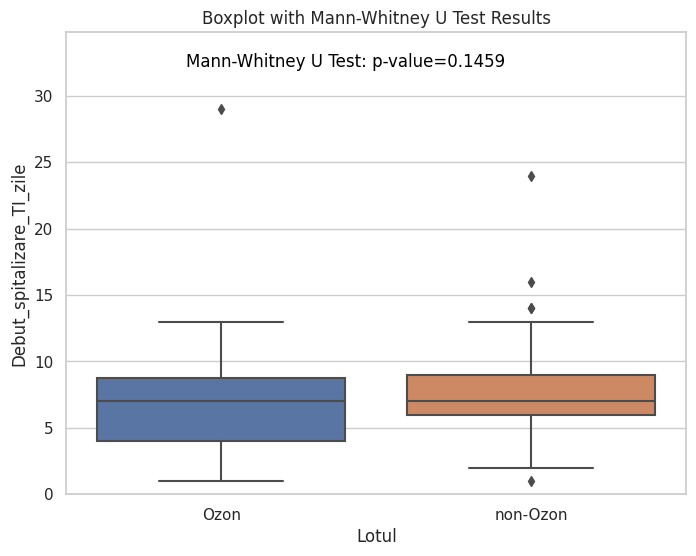

          count  mean  std  min  25%  50%  75%   max
Lotul                                               
Ozon       50.0   4.2  4.3  0.0  0.0  3.0  7.0  17.0
non-Ozon   50.0   4.8  6.5  0.0  1.0  3.0  5.0  33.0



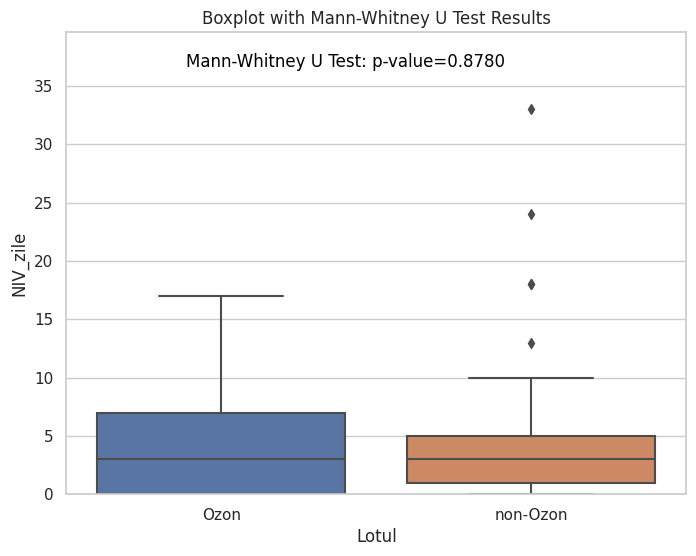

          count  mean  std  min  25%  50%  75%   max
Lotul                                               
Ozon       50.0   1.5  3.8  0.0  0.0  0.0  0.0  18.0
non-Ozon   50.0   2.8  5.5  0.0  0.0  0.0  5.0  29.0



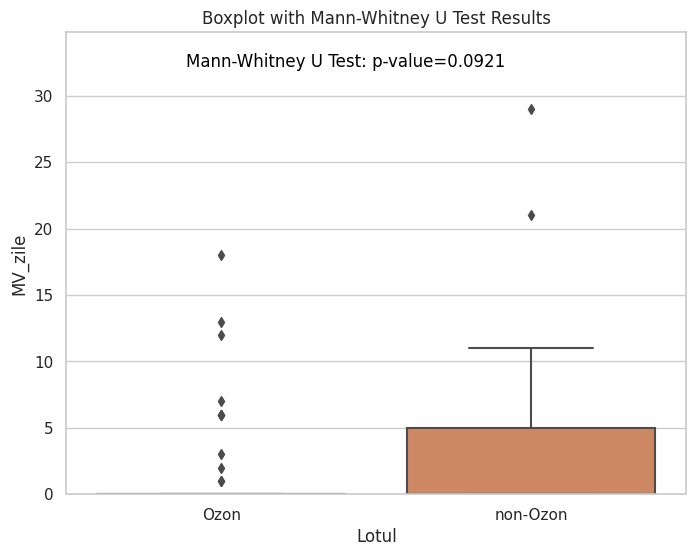

          count  mean  std  min  25%  50%   75%   max
Lotul                                                
Ozon       50.0   8.6  5.3  2.0  4.0  7.0  12.0  23.0
non-Ozon   50.0  10.2  9.0  3.0  5.0  7.0  11.0  46.0



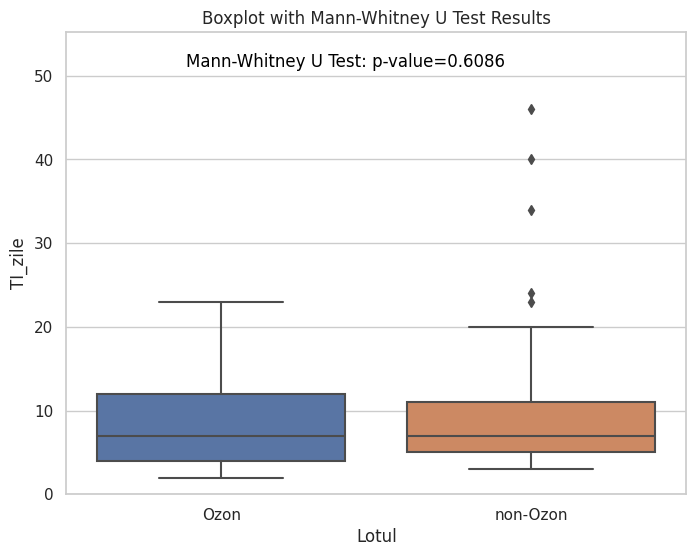

          count  mean   std  min   25%   50%   75%   max
Lotul                                                   
Ozon       50.0  17.8   8.9  2.0  12.2  17.0  21.0  48.0
non-Ozon   50.0  17.1  10.6  6.0  10.0  13.0  19.8  46.0



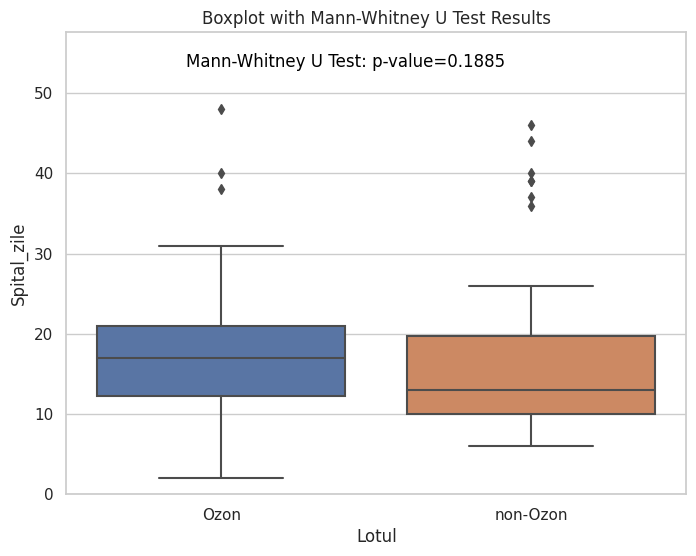

          count   mean   std    min    25%    50%    75%    max
Lotul                                                          
Ozon       50.0  246.9  30.3  201.0  224.0  247.0  272.8  300.0
non-Ozon   50.0  235.9  33.4  201.0  206.0  225.0  260.2  300.0



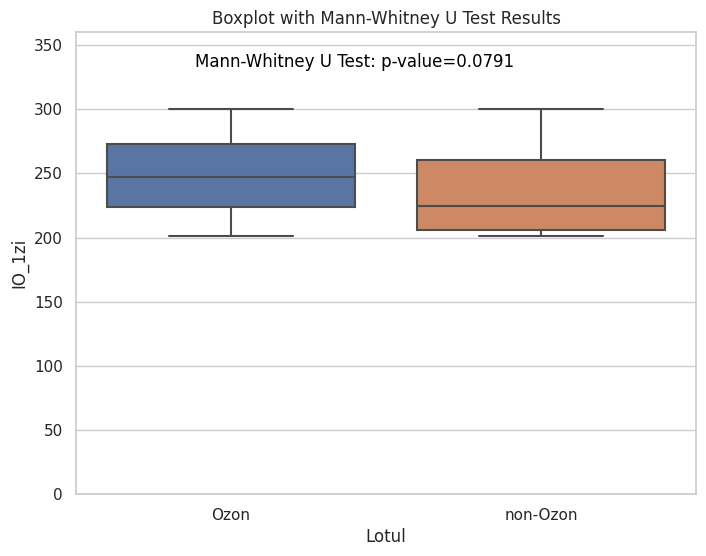

          count   mean    std   min    25%    50%    75%    max
Lotul                                                          
Ozon       48.0  296.8  105.1  54.0  240.0  288.5  381.2  540.0
non-Ozon   50.0  232.8  110.6  56.0  153.0  210.0  313.0  504.0



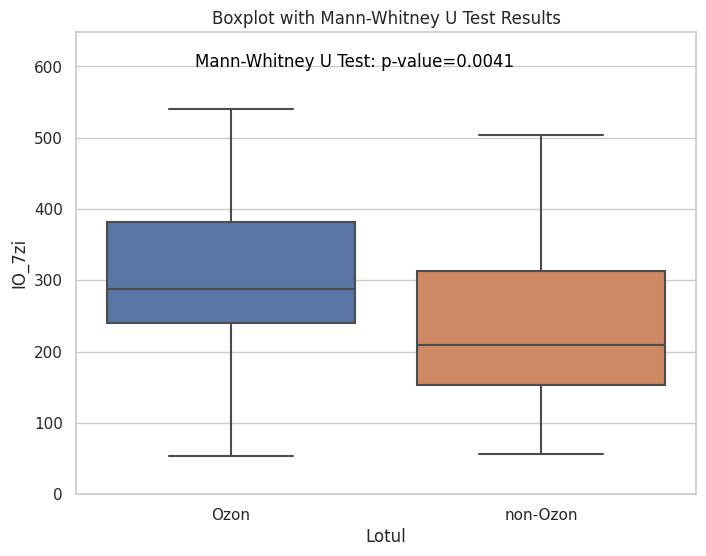

          count  mean   std  min   25%   50%    75%    max
Lotul                                                     
Ozon       50.0  75.2  53.9  0.1  28.2  67.2  107.0  200.0
non-Ozon   50.0  82.5  59.9  6.0  24.0  93.2  122.6  240.0



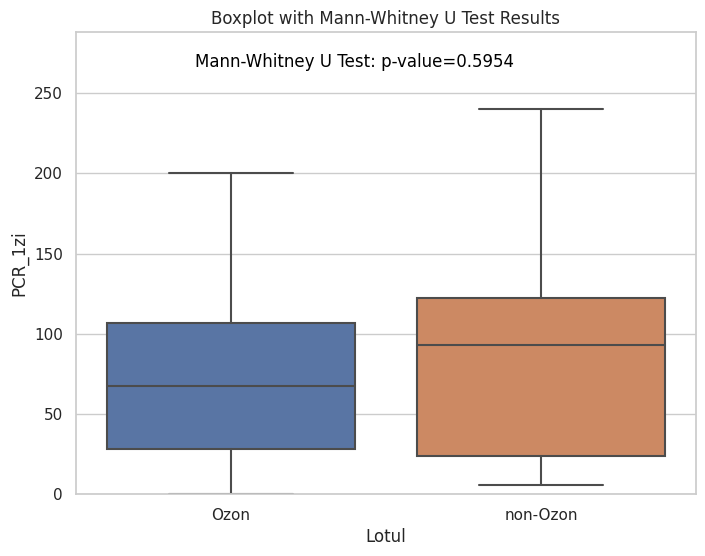

          count  mean   std  min   25%   50%   75%    max
Lotul                                                    
Ozon       48.0  44.9  53.2  0.0  11.9  17.6  65.2  195.4
non-Ozon   49.0  44.9  57.9  0.0  12.0  24.0  59.3  314.0



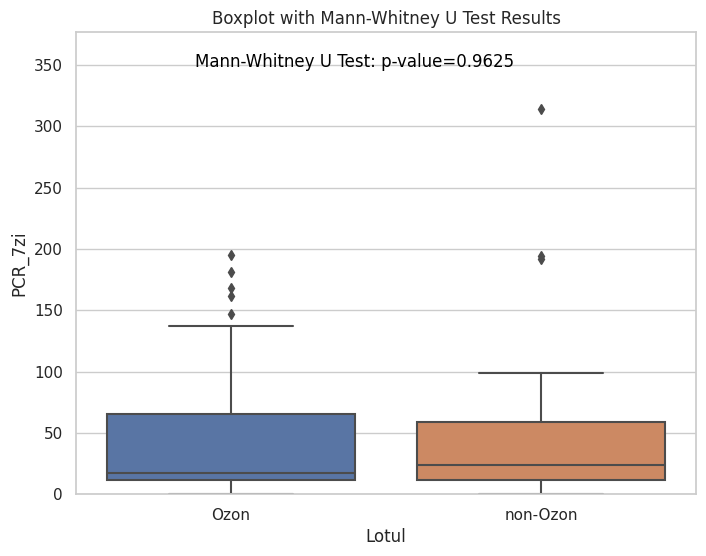

          count  mean  std  min  25%  50%  75%  max
Lotul                                              
Ozon       50.0   0.2  0.3  0.0  0.1  0.1  0.1  2.3
non-Ozon   50.0   0.1  0.1  0.0  0.1  0.1  0.1  0.5



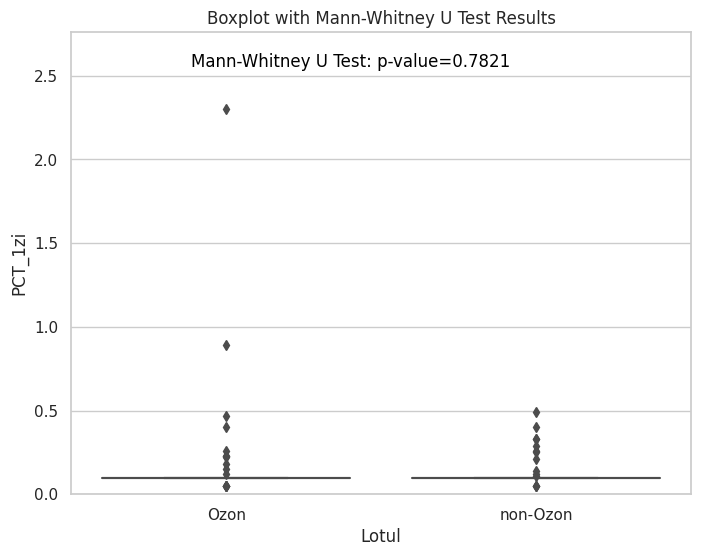

          count  mean  std  min  25%  50%  75%  max
Lotul                                              
Ozon       48.0   0.2  0.3  0.0  0.1  0.1  0.1  1.8
non-Ozon   50.0   0.1  0.2  0.0  0.1  0.1  0.1  1.1



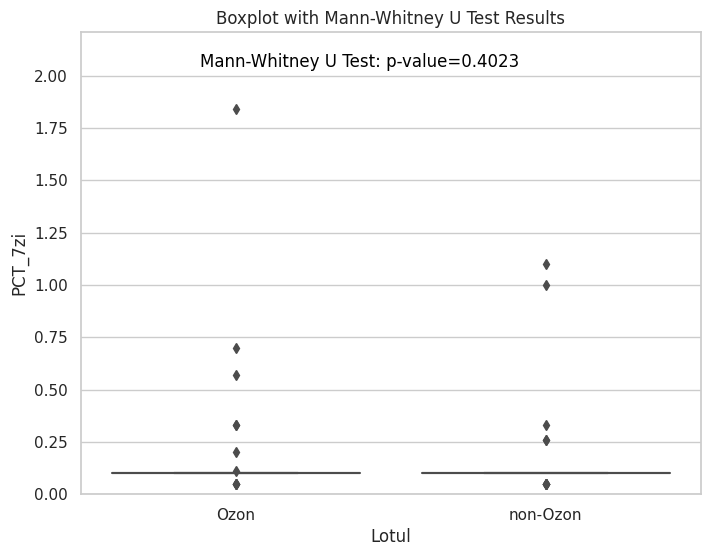

          count  mean  std  min  25%  50%   75%   max
Lotul                                                
Ozon       50.0   8.3  1.6  6.0  7.0  9.0  10.0  10.0
non-Ozon   50.0   8.4  1.3  6.0  8.0  8.0   9.8  10.0



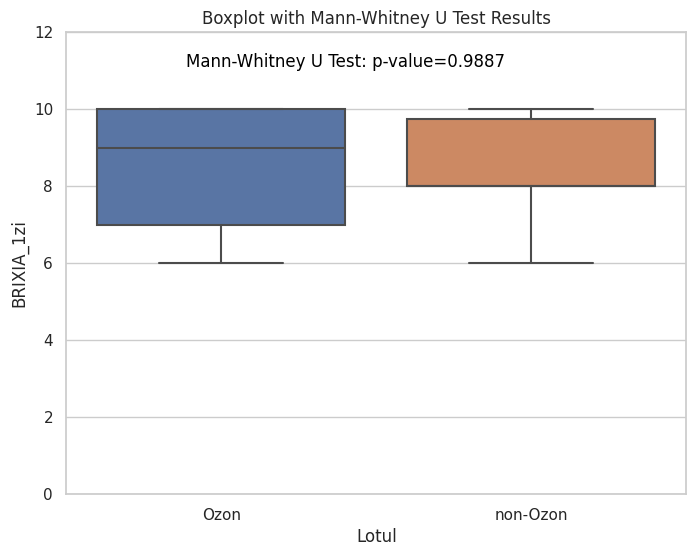

          count  mean  std  min  25%  50%   75%   max
Lotul                                                
Ozon       48.0   7.5  4.0  0.0  5.0  8.0  10.0  15.0
non-Ozon   50.0   9.4  4.1  3.0  6.0  9.0  12.8  18.0



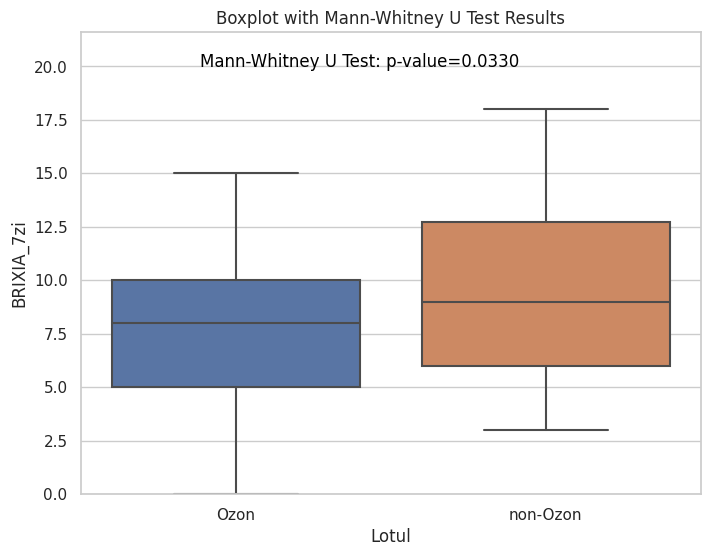

          count  mean  std  min  25%  50%   75%   max
Lotul                                                
Ozon       50.0  10.1  5.2  3.2  6.7  8.8  12.2  27.1
non-Ozon   50.0   9.2  4.5  1.8  5.6  8.4  12.5  22.7



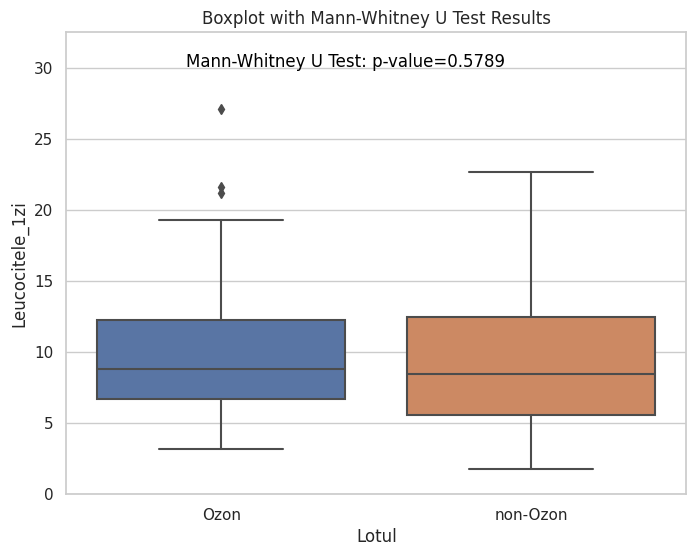

          count  mean  std  min  25%   50%   75%   max
Lotul                                                 
Ozon       48.0   9.8  4.1  4.1  7.4   8.8  10.9  27.9
non-Ozon   50.0  11.8  7.9  2.8  8.2  10.8  13.0  58.1



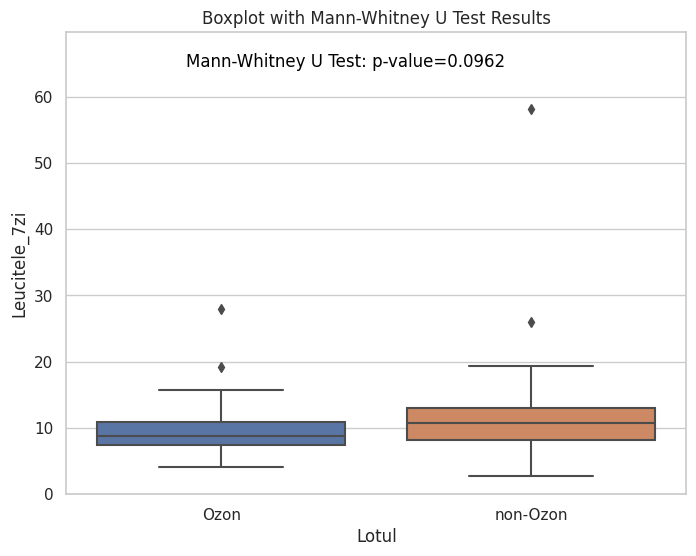

          count  mean  std  min  25%  50%  75%   max
Lotul                                               
Ozon       50.0   1.0  0.8  0.1  0.4  0.8  1.3   4.1
non-Ozon   50.0   2.0  2.5  0.1  0.4  1.2  2.5  10.0



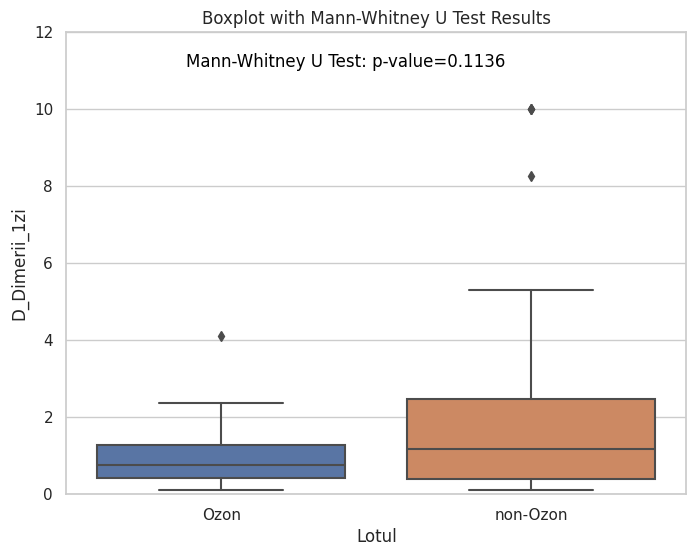

          count  mean  std  min  25%  50%  75%   max
Lotul                                               
Ozon       48.0   2.6  2.9  0.1  0.6  1.2  3.2  10.0
non-Ozon   50.0   3.0  2.9  0.1  0.8  2.1  4.1  10.0



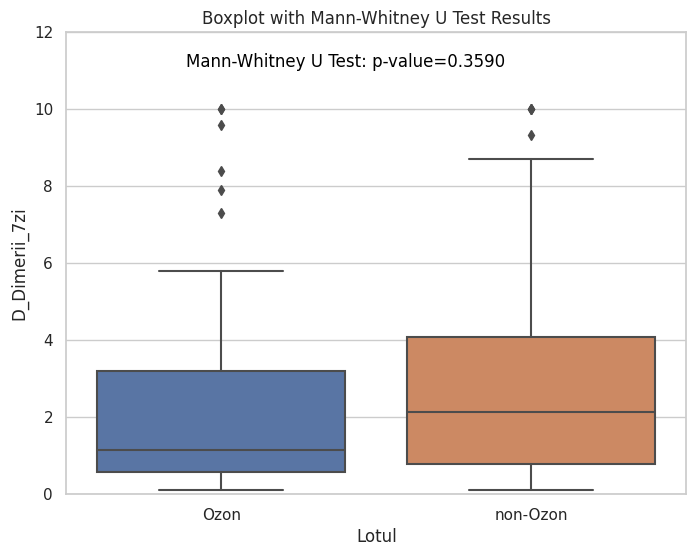

          count  mean  std  min  25%  50%  75%  max
Lotul                                              
Ozon       50.0   3.7  0.5  3.0  3.0  4.0  4.0  4.0
non-Ozon   50.0   3.7  0.5  3.0  3.0  4.0  4.0  4.0



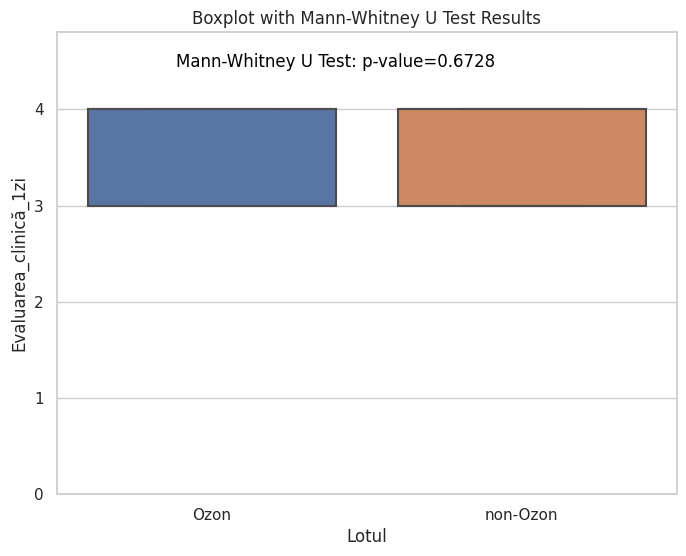

          count  mean  std  min  25%  50%  75%  max
Lotul                                              
Ozon       50.0   2.5  1.6  1.0  1.0  2.0  4.0  6.0
non-Ozon   50.0   2.8  1.8  1.0  1.0  2.5  4.8  6.0



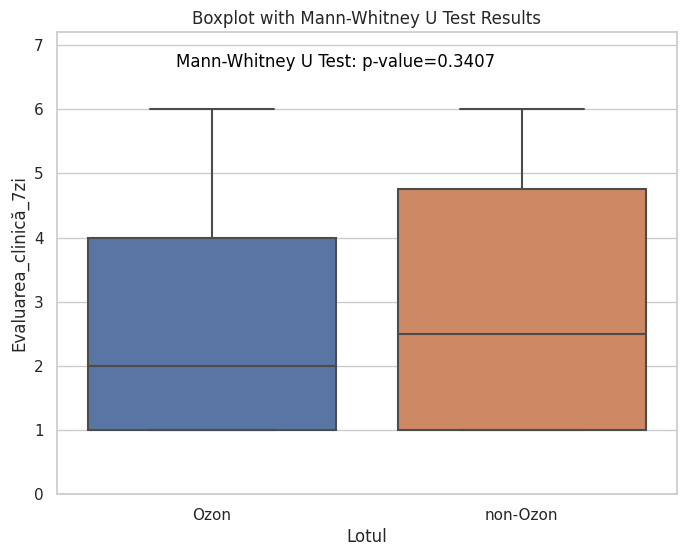

          count   mean   std   min    25%    50%    75%    max
Lotul                                                         
Ozon       50.0  128.8  14.6  81.0  122.0  130.0  137.8  160.0
non-Ozon   50.0  127.2  16.5  88.0  117.0  128.0  138.5  173.0



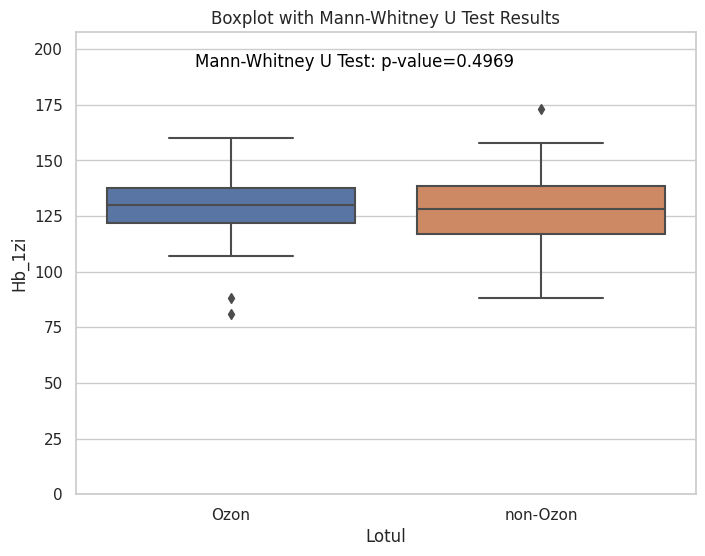

          count   mean   std   min    25%    50%    75%    max
Lotul                                                         
Ozon       48.0  119.9  17.1  83.0  108.5  121.0  129.8  157.0
non-Ozon   50.0  119.9  18.2  78.0  107.0  123.0  130.0  169.0



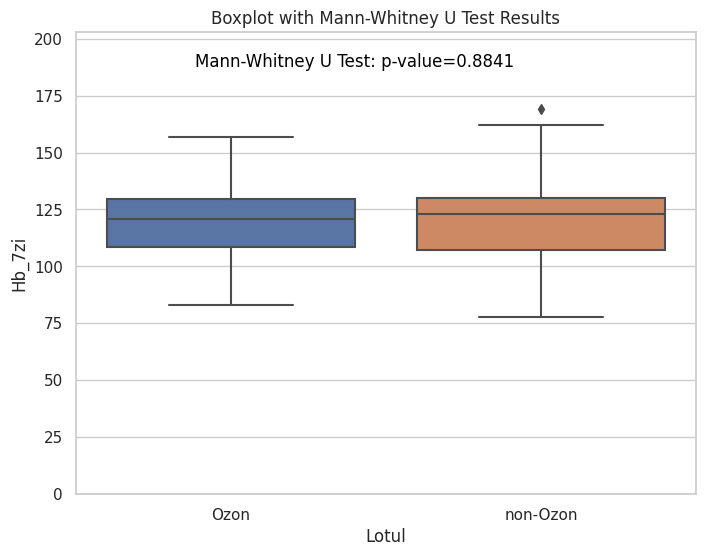

          count  mean   std   min   25%   50%   75%   max
Lotul                                                    
Ozon       50.0  71.7  13.3  14.0  68.0  75.5  78.8  91.0
non-Ozon   50.0  71.8  10.6  20.0  69.0  73.5  77.8  88.0



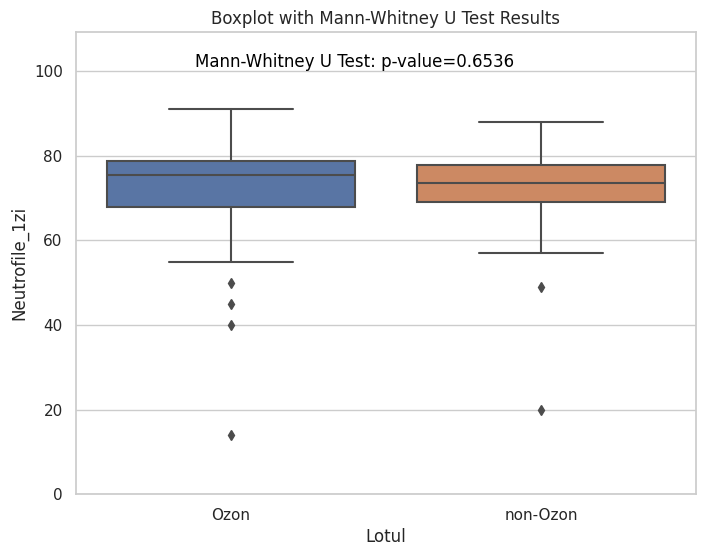

          count  mean   std   min   25%   50%   75%   max
Lotul                                                    
Ozon       48.0  72.1  12.8  16.0  68.8  74.5  79.0  90.0
non-Ozon   50.0  74.0  11.5  43.0  68.2  74.0  82.0  94.0



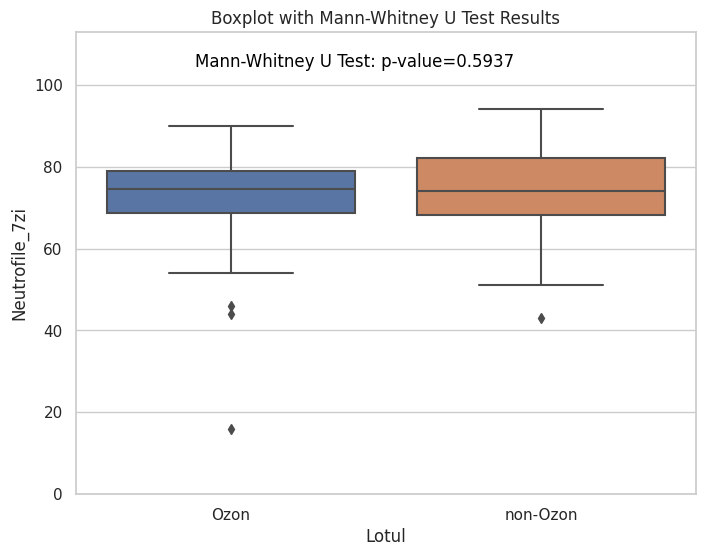

          count  mean  std  min  25%   50%   75%   max
Lotul                                                 
Ozon       50.0  10.4  6.5  1.0  7.0  10.0  13.0  35.0
non-Ozon   50.0  11.9  7.1  1.0  6.2  10.0  16.0  32.0



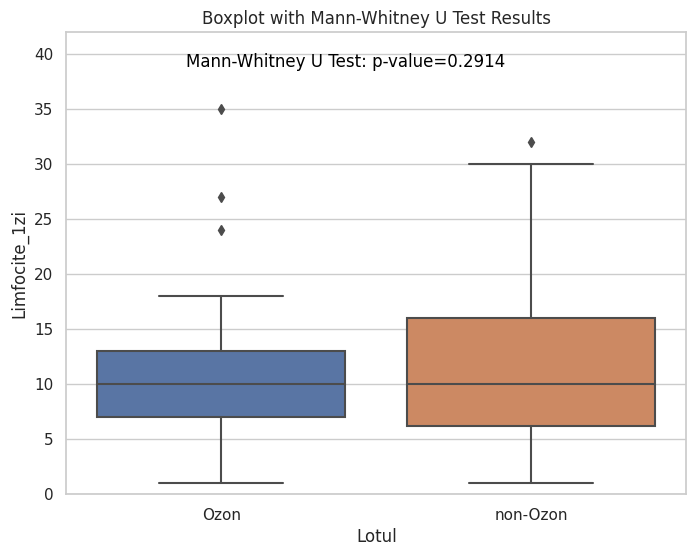

          count  mean  std  min  25%   50%   75%   max
Lotul                                                 
Ozon       48.0  11.8  7.3  2.0  7.0   9.5  16.0  33.0
non-Ozon   50.0  11.3  6.9  2.0  5.0  10.0  15.0  29.0



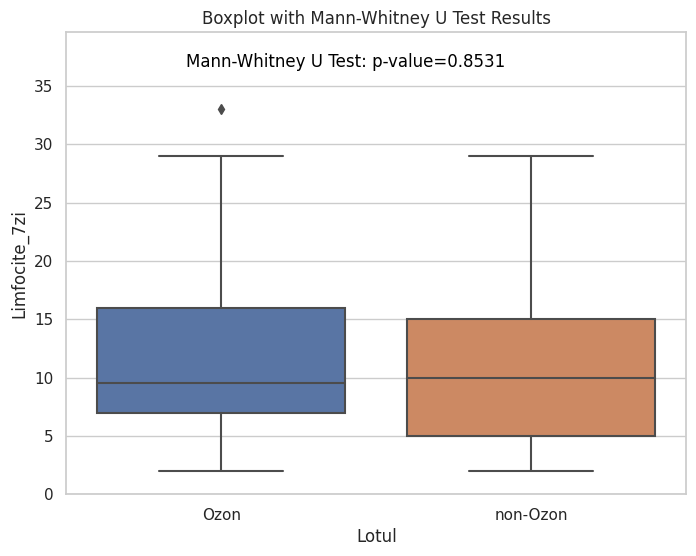

          count  mean   std  min  25%  50%   75%   max
Lotul                                                 
Ozon       50.0  11.8  13.2  1.0  5.2  8.0  12.0  79.0
non-Ozon   50.0   9.0   5.9  2.0  5.0  7.0  12.0  28.0



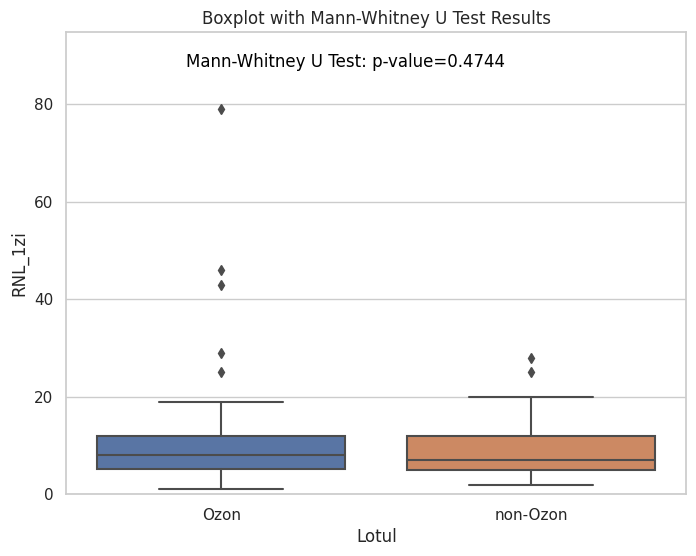

          count  mean  std  min  25%  50%   75%   max
Lotul                                                
Ozon       48.0   9.9  7.4  1.0  5.0  8.0  12.0  38.0
non-Ozon   50.0  10.7  9.0  2.0  5.0  8.0  16.8  43.0



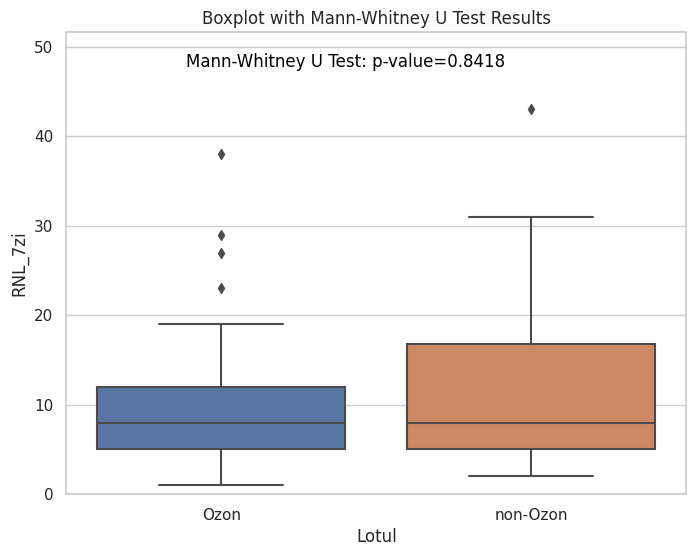

          count   mean   std    min    25%    50%    75%    max
Lotul                                                          
Ozon       50.0  241.6  91.1  107.0  179.5  230.5  283.5  523.0
non-Ozon   50.0  219.8  80.0   93.0  162.2  209.5  277.5  392.0



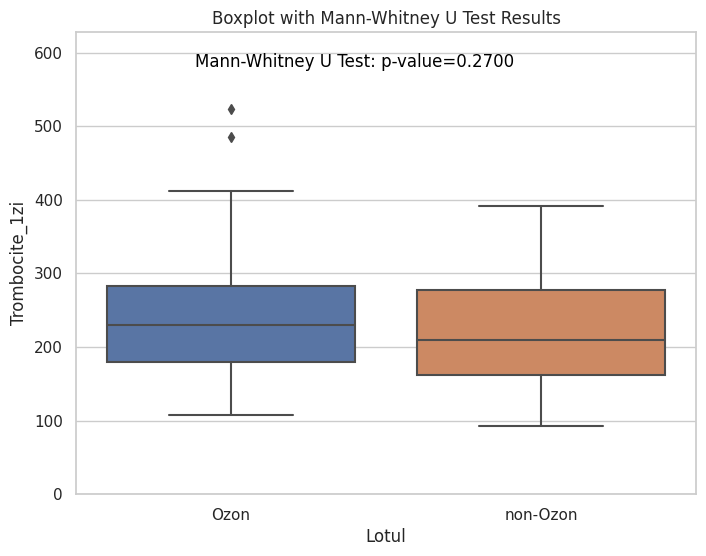

          count   mean    std    min    25%    50%    75%    max
Lotul                                                           
Ozon       48.0  284.2  101.0  119.0  201.5  264.5  364.8  577.0
non-Ozon   50.0  276.5  112.3   90.0  190.8  253.5  367.8  487.0



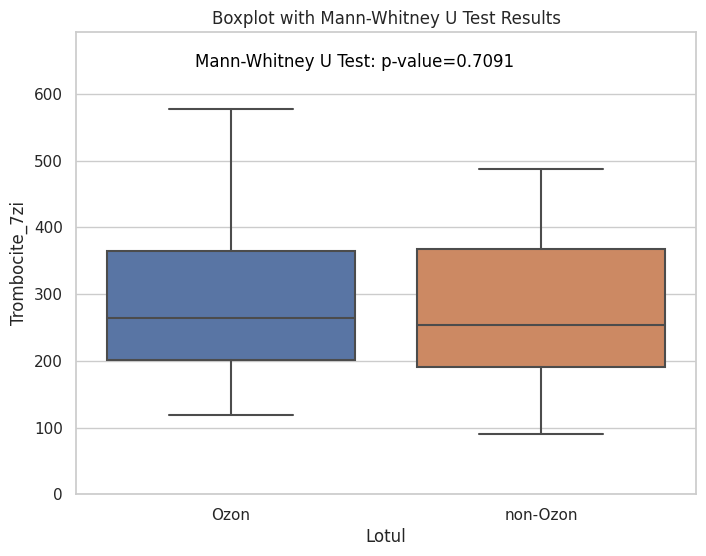

          count  mean  std  min  25%  50%  75%   max
Lotul                                               
Ozon       50.0   7.4  3.4  3.1  5.4  7.0  8.3  21.0
non-Ozon   50.0   8.1  5.6  3.1  4.9  6.8  9.3  39.2



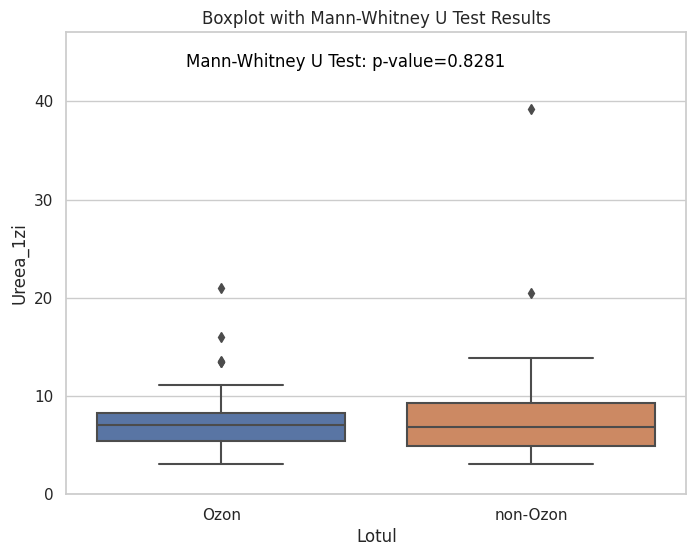

          count  mean  std  min  25%  50%  75%   max
Lotul                                               
Ozon       48.0   7.3  2.9  3.1  5.2  6.9  8.4  16.6
non-Ozon   50.0   9.3  7.7  2.0  5.7  7.7  9.5  44.0



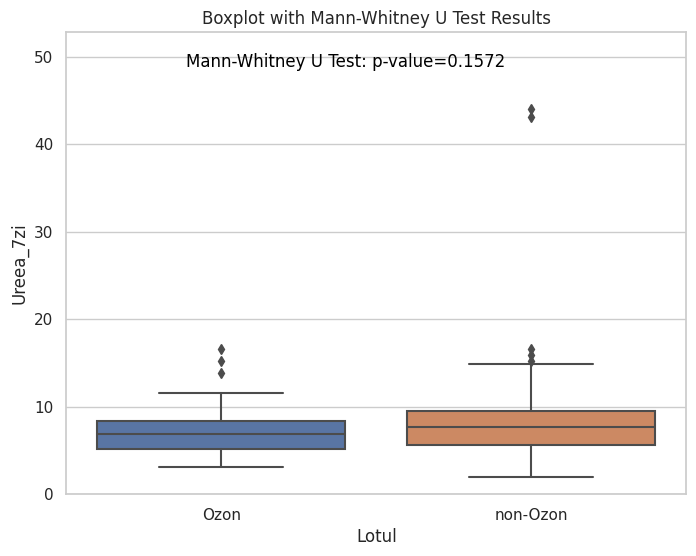

In [96]:
for el in ['Vârsta', 'Debut_spitalizare_TI_zile', 'NIV_zile', 'MV_zile',
       'TI_zile', 'Spital_zile', 'IO_1zi', 'IO_7zi', 'PCR_1zi', 'PCR_7zi',
       'PCT_1zi', 'PCT_7zi', 'BRIXIA_1zi', 'BRIXIA_7zi', 'Leucocitele_1zi',
       'Leucitele_7zi', 'D_Dimerii_1zi', 'D_Dimerii_7zi',
       'Evaluarea_clinică_1zi', 'Evaluarea_clinică_7zi', 'Hb_1zi', 'Hb_7zi',
       'Neutrofile_1zi', 'Neutrofile_7zi', 'Limfocite_1zi', 'Limfocite_7zi',
       'RNL_1zi', 'RNL_7zi', 'Trombocite_1zi', 'Trombocite_7zi', 'Ureea_1zi',
       'Ureea_7zi']:
       boxplot_with_mannwhitneyu(df, 'Lotul', el)



# Categorical Variables

In [66]:
df.Lotul.value_counts()

Ozon        50
non-Ozon    50
Name: Lotul, dtype: int64

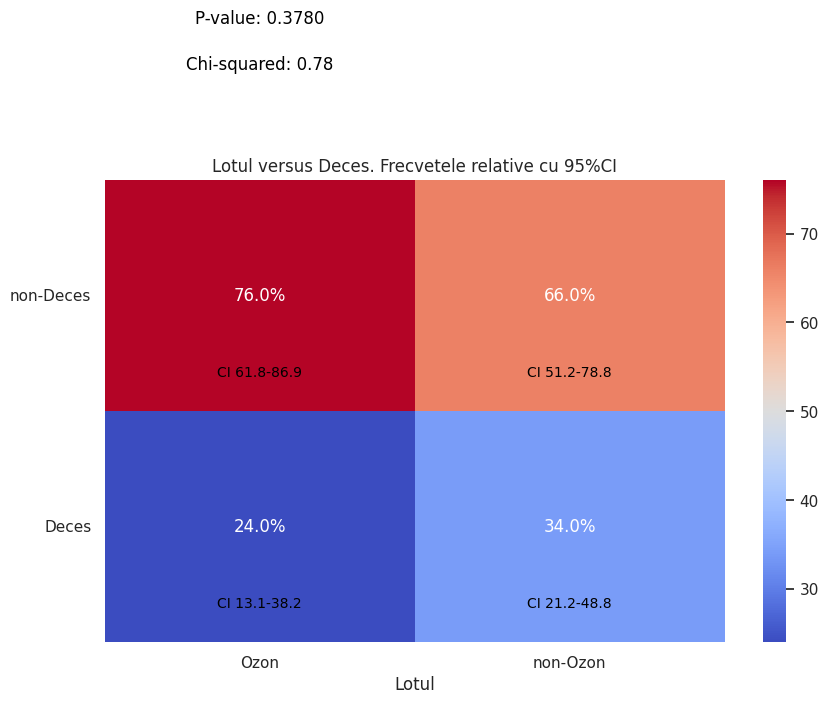

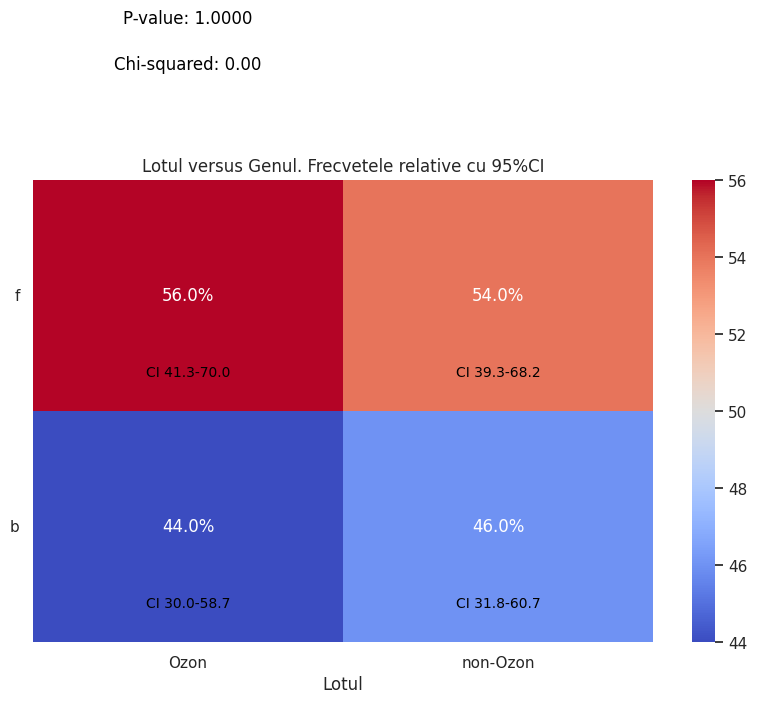

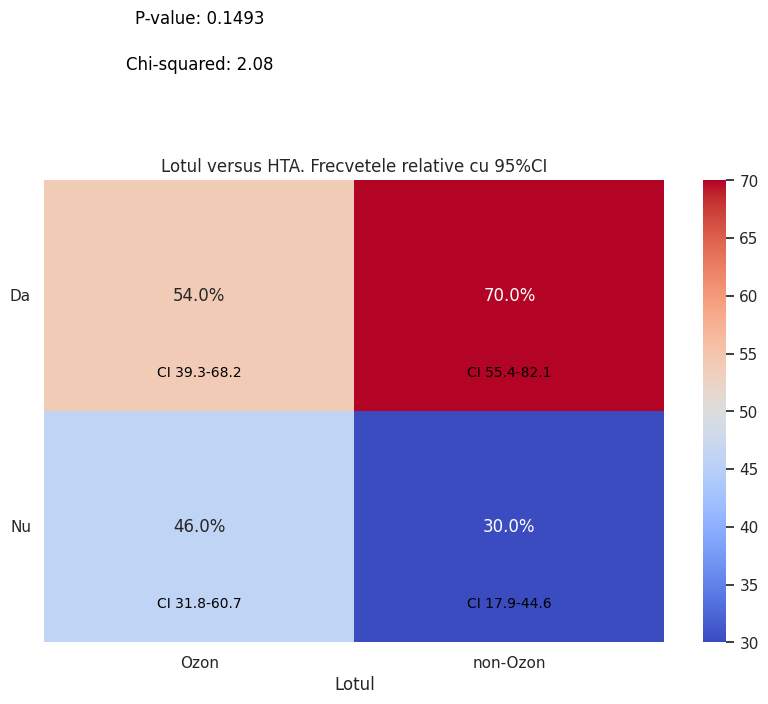

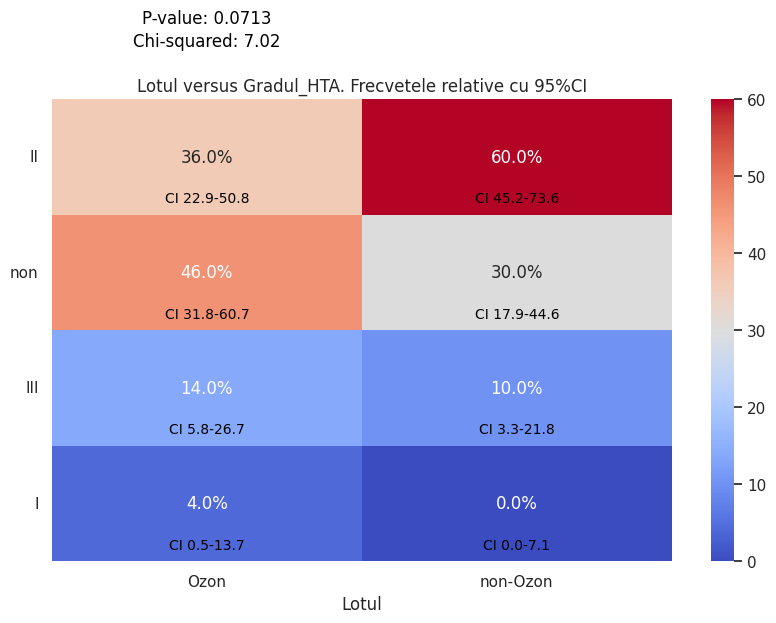

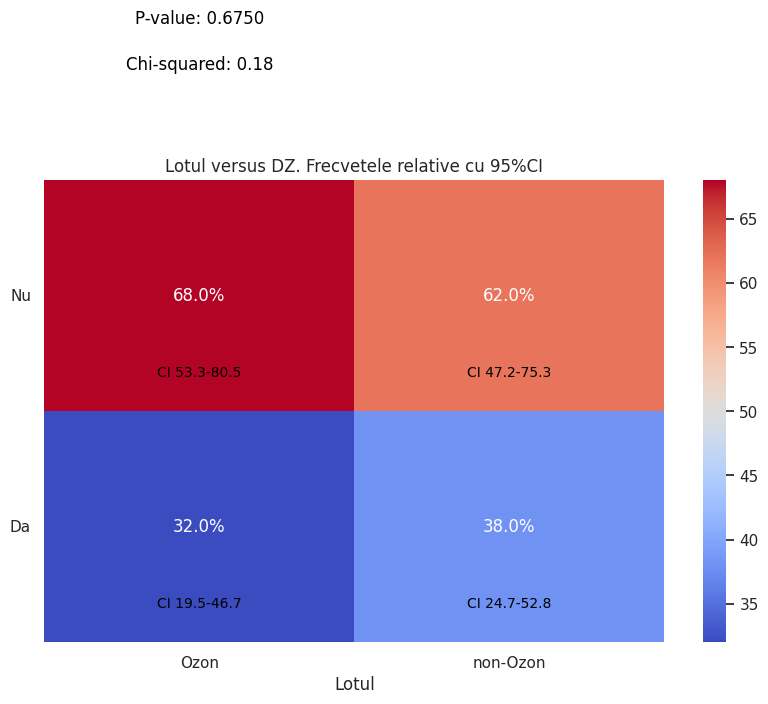

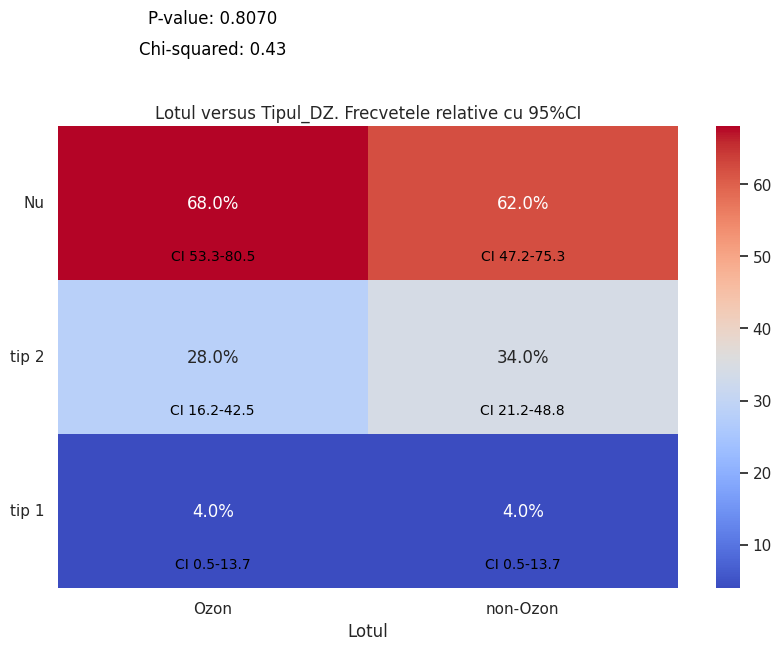

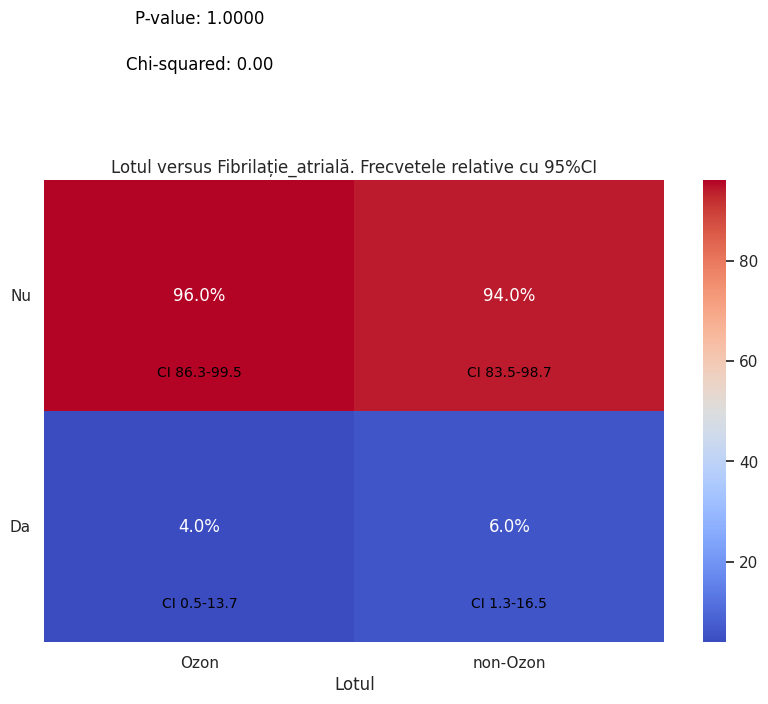

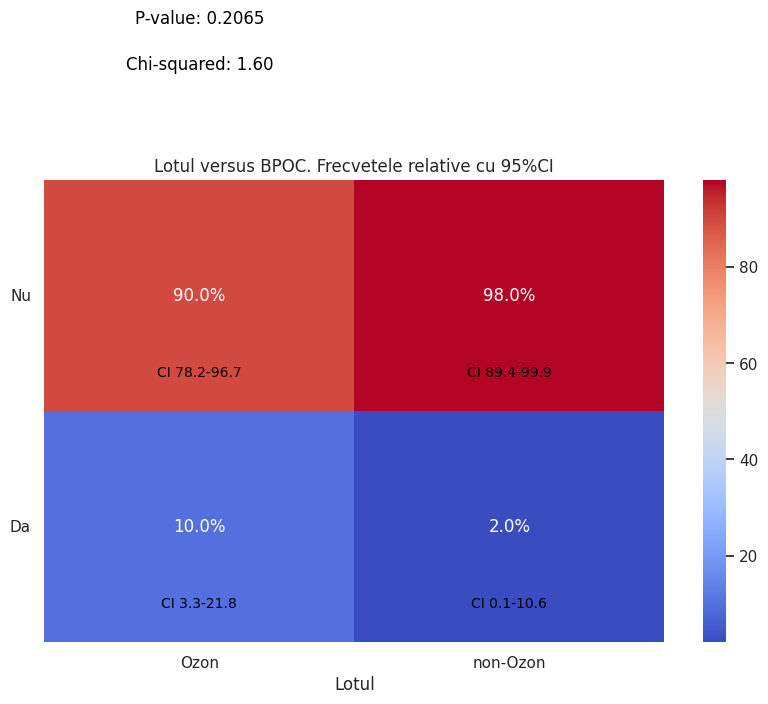

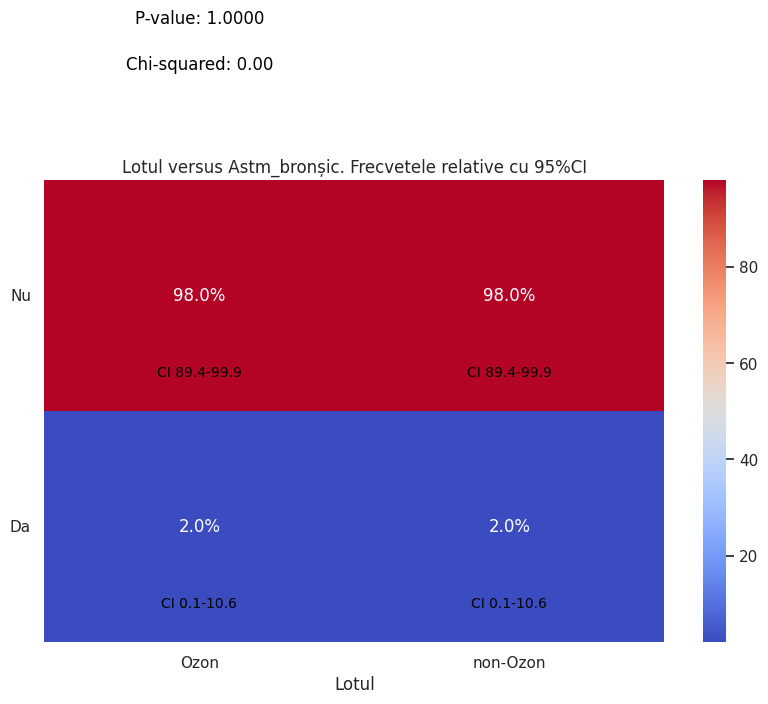

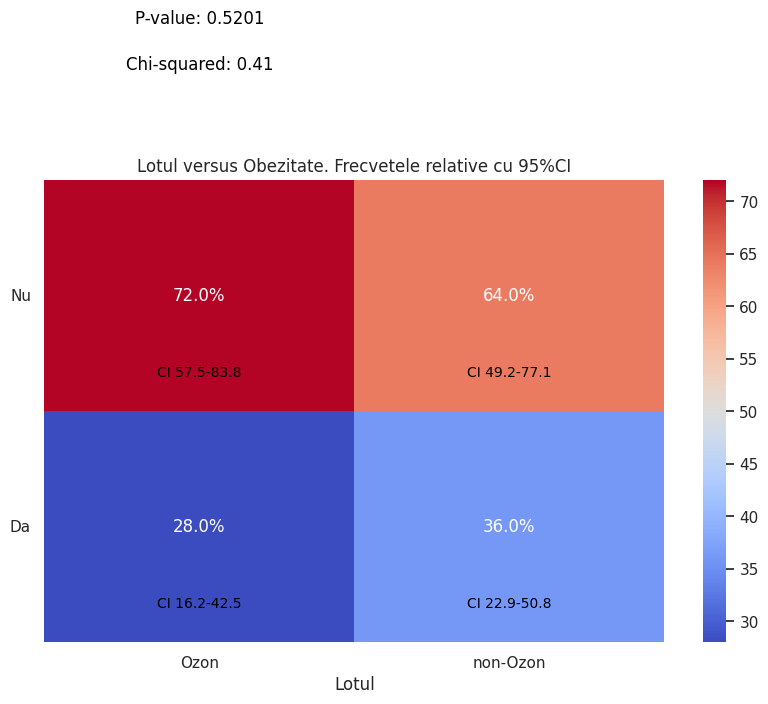

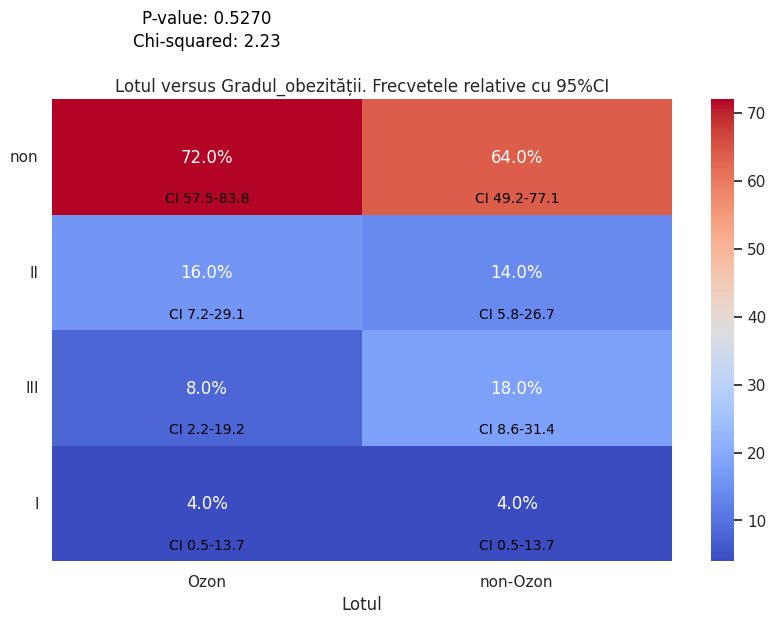

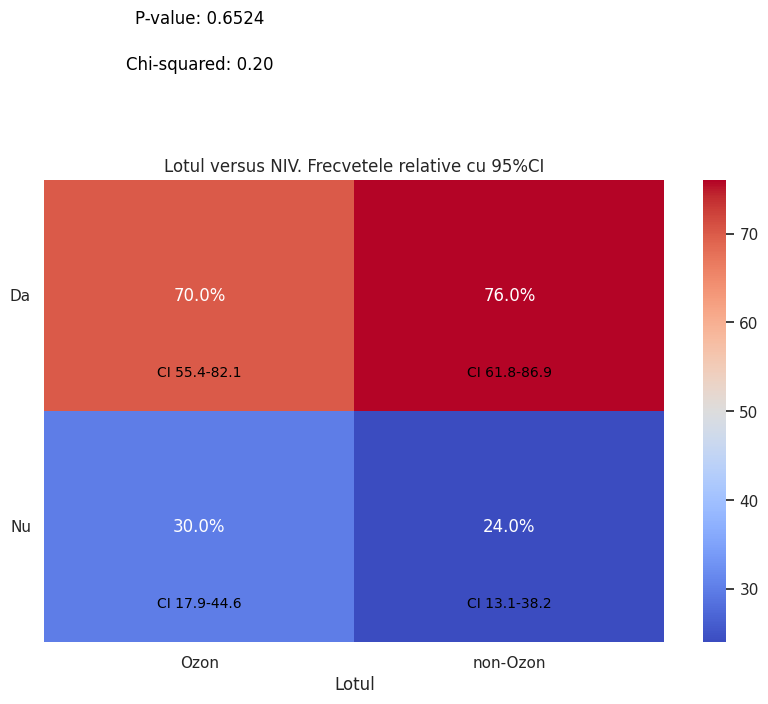

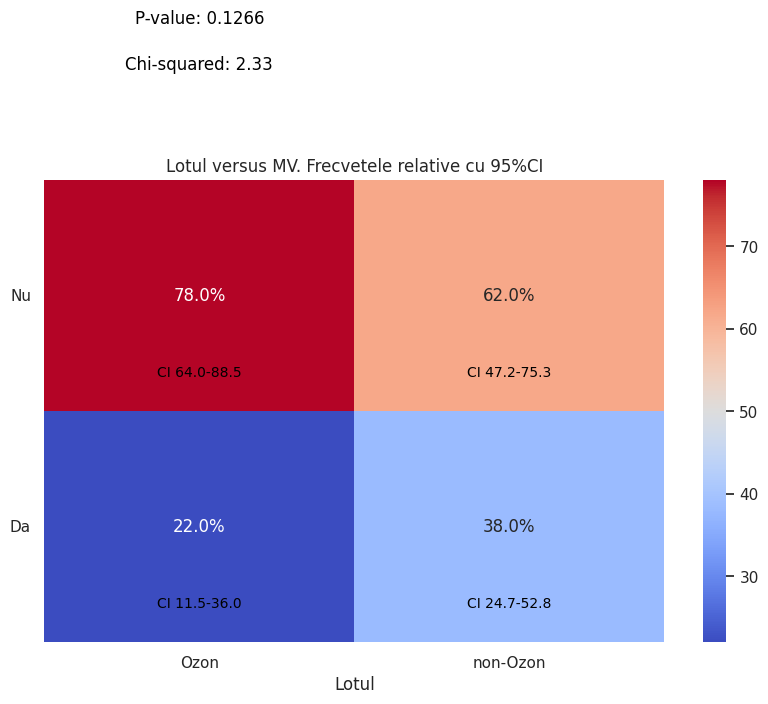

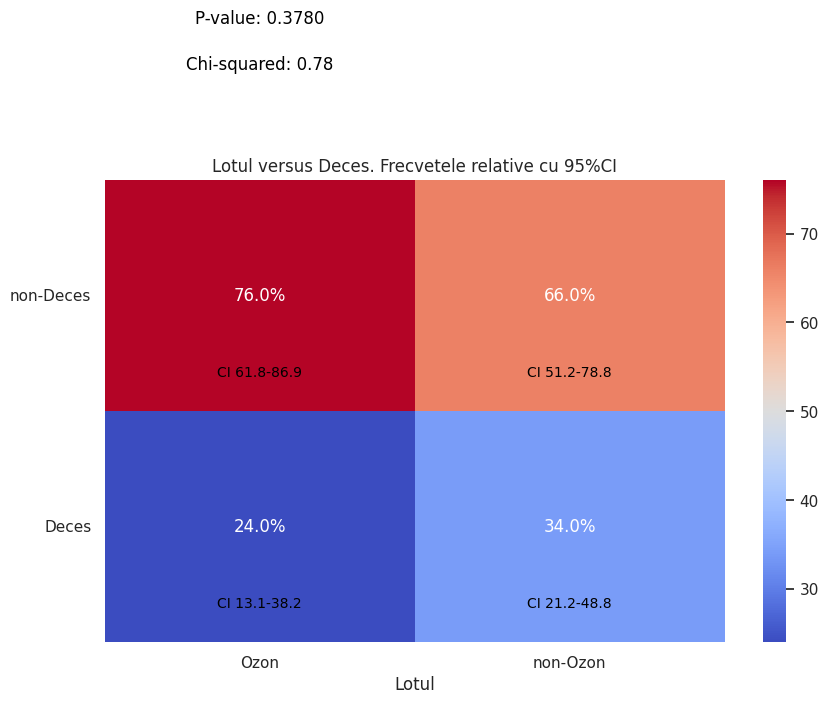

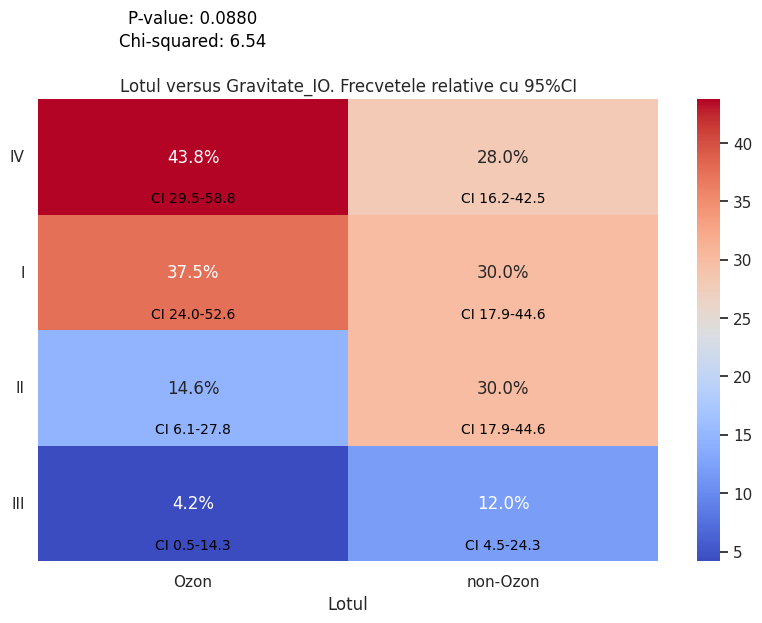

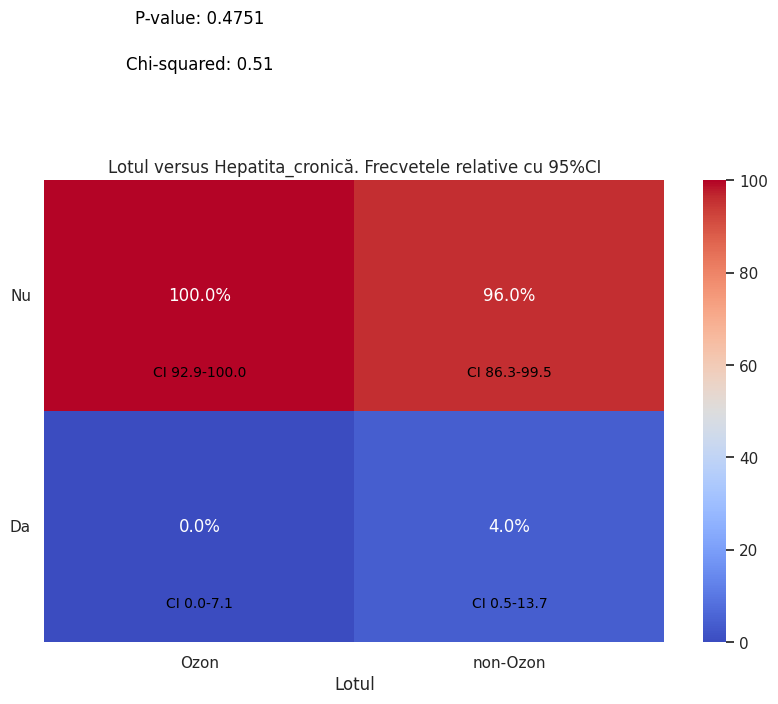

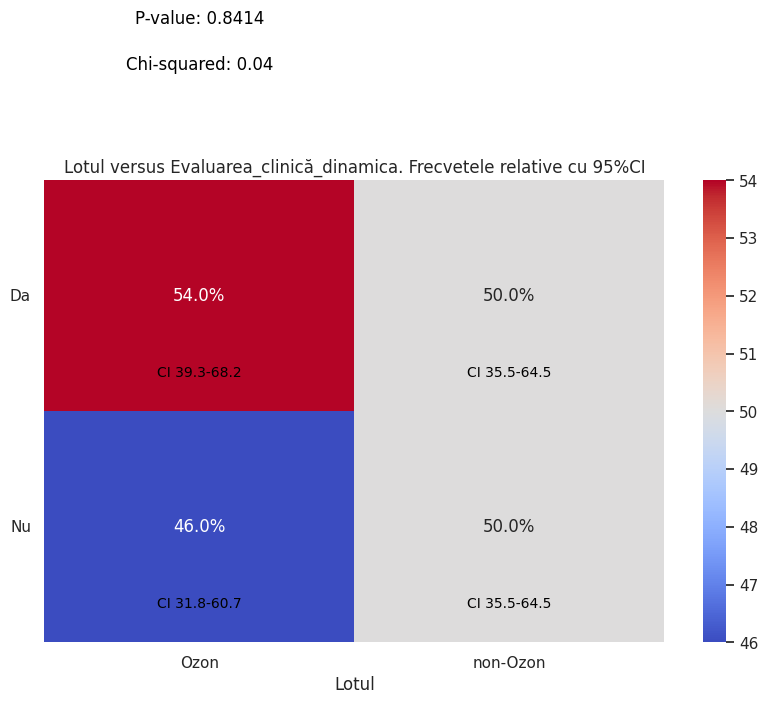

In [99]:

# factors = []

# for el in ['Deces', 'Genul', 'HTA', 'Gradul_HTA', 'DZ', 'Tipul_DZ',
#            'Fibrilație_atrială', 'BPOC', 'Astm_bronșic',
#            'Obezitate', 'Gradul_obezității', 'NIV', 'MV', 'Deces', 'Gravitate_IO',
#            'Hepatita_cronică', 'Evaluarea_clinică_dinamica']:
#            factors.append([el, ['Ozon', 'non-Ozon']])


# outcomes = ['Lotul']
# graph_cat_per (factors, outcomes)

factors = []

for el in ['Lotul']:
           factors.append([el, ['Ozon', 'non-Ozon']])


outcomes = ['Deces', 'Genul', 'HTA', 'Gradul_HTA', 'DZ', 'Tipul_DZ',
            'Fibrilație_atrială', 'BPOC', 'Astm_bronșic',
            'Obezitate', 'Gradul_obezității', 'NIV', 'MV', 'Deces', 'Gravitate_IO',
            'Hepatita_cronică', 'Evaluarea_clinică_dinamica']
graph_cat_per (factors, outcomes)




# Predictive model

In [100]:
df.select_dtypes(include='number').columns


Index(['ID', 'Vârsta', 'Debut_spitalizare_TI_zile', 'NIV_zile', 'MV_zile',
       'TI_zile', 'Spital_zile', 'IO_1zi', 'IO_7zi', 'PCR_1zi', 'PCR_7zi',
       'PCT_1zi', 'PCT_7zi', 'BRIXIA_1zi', 'BRIXIA_7zi', 'Leucocitele_1zi',
       'Leucitele_7zi', 'D_Dimerii_1zi', 'D_Dimerii_7zi',
       'Evaluarea_clinică_1zi', 'Evaluarea_clinică_7zi', 'Hb_1zi', 'Hb_7zi',
       'Neutrofile_1zi', 'Neutrofile_7zi', 'Limfocite_1zi', 'Limfocite_7zi',
       'RNL_1zi', 'RNL_7zi', 'Trombocite_1zi', 'Trombocite_7zi', 'Ureea_1zi',
       'Ureea_7zi'],
      dtype='object')

In [101]:
df.select_dtypes(include='object').columns

Index(['Lotul', 'Genul', 'HTA', 'Gradul_HTA', 'DZ', 'Tipul_DZ',
       'Fibrilație_atrială', 'BPOC', 'Astm_bronșic', 'Obezitate',
       'Gradul_obezității', 'NIV', 'MV', 'Deces', 'Gravitate_IO',
       'Hepatita_cronică', 'Evaluarea_clinică_dinamica'],
      dtype='object')

In [ ]:
# ['Vârsta', 'Debut_spitalizare_TI_zile', 'IO_1zi', 'PCR_1zi',
#  'PCT_1zi', 'BRIXIA_1zi', 'Leucocitele_1zi', 'D_Dimerii_1zi',
#  'Evaluarea_clinică_1zi', 'Hb_1zi', 'Neutrofile_1zi', 'Limfocite_1zi',
#  'RNL_1zi', 'Trombocite_1zi', 'Ureea_1zi']

# ['Lotul', 'Genul', 'HTA', 'DZ', 'Fibrilație_atrială', 'BPOC', 'Astm_bronșic', 'Obezitate']

# ['Deces']

In [109]:
for el in ['Lotul', 'Genul', 'HTA', 'DZ', 'Fibrilație_atrială', 'BPOC', 'Astm_bronșic', 'Obezitate', 'Deces']:
  if el == 'Lotul':
    df[el] = df[el].replace(['Ozon', 'non-Ozon'], [1, 0])
  elif el == 'Genul':
    df[el] = df[el].replace(['f', 'b'], [0, 1])
  elif el == 'HTA':
    df[el] = df[el].replace(['Da', 'Nu'], [1, 0])
  elif el == 'Deces':
    df[el] = df[el].replace(['non-Deces', 'Deces'], [0, 1])
  else:
    df[el] = df[el].replace(['Da', 'Nu'], [1, 0])
  print(df[el].value_counts().index)

Int64Index([1, 0], dtype='int64')
Int64Index([0, 1], dtype='int64')
Int64Index([1, 0], dtype='int64')
Int64Index([0, 1], dtype='int64')
Int64Index([0, 1], dtype='int64')
Int64Index([0, 1], dtype='int64')
Int64Index([0, 1], dtype='int64')
Int64Index([0, 1], dtype='int64')
Int64Index([0, 1], dtype='int64')


In [134]:
X = df[['Vârsta', 'Debut_spitalizare_TI_zile', 'IO_1zi', 'PCR_1zi',
 'PCT_1zi', 'BRIXIA_1zi', 'Leucocitele_1zi', 'D_Dimerii_1zi',
 'Evaluarea_clinică_1zi', 'Hb_1zi', 'Neutrofile_1zi', 'Limfocite_1zi',
 'RNL_1zi', 'Trombocite_1zi', 'Ureea_1zi', 'Lotul', 'Genul', 'HTA', 'DZ', 'Fibrilație_atrială', 'BPOC', 'Astm_bronșic', 'Obezitate']]

y = df.Deces

In [135]:
X.shape

(100, 23)

In [136]:
y.shape

(100,)

In [137]:
import sklearn
from numpy import hstack
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_recall_curve, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_validate

import numpy as np

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [139]:
print(X_test.shape)
print(X_train.shape)

(20, 23)
(80, 23)


In [140]:
X_train.isna().sum()

Vârsta                       0
Debut_spitalizare_TI_zile    0
IO_1zi                       0
PCR_1zi                      0
PCT_1zi                      0
BRIXIA_1zi                   0
Leucocitele_1zi              0
D_Dimerii_1zi                0
Evaluarea_clinică_1zi        0
Hb_1zi                       0
Neutrofile_1zi               0
Limfocite_1zi                0
RNL_1zi                      0
Trombocite_1zi               0
Ureea_1zi                    0
Lotul                        0
Genul                        0
HTA                          0
DZ                           0
Fibrilație_atrială           0
BPOC                         0
Astm_bronșic                 0
Obezitate                    0
dtype: int64

In [131]:
# #https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

# from sklearn.preprocessing import RobustScaler

# continuos=['Vârsta', 'Debut_spitalizare_TI_zile', 'IO_1zi', 'PCR_1zi',
#  'PCT_1zi', 'BRIXIA_1zi', 'Leucocitele_1zi', 'D_Dimerii_1zi',
#  'Evaluarea_clinică_1zi', 'Hb_1zi', 'Neutrofile_1zi', 'Limfocite_1zi',
#  'RNL_1zi', 'Trombocite_1zi', 'Ureea_1zi']

# rs = RobustScaler()
# #X_train[continuos] = pd.DataFrame(rs.fit_transform(X_train[continuos]),columns = X_train[continuos].columns)
# #X_val_i[continuos] = pd.DataFrame(rs.fit_transform(X_train_i[continuos]),columns = X_train_i[continuos].columns)
# X_test[continuos] = pd.DataFrame(rs.fit_transform(X_test[continuos]),columns = X_test[continuos].columns)
# X_train[continuos] = pd.DataFrame(rs.fit_transform(X_train[continuos]),columns = X_train[continuos].columns)

# print(X_train.shape)
# print(X_test.shape)

#X_train_i.drop('NISS_Alternative', axis=1, inplace=True)
#X_test_i.drop('NISS_Alternative', axis=1, inplace=True)

#X_train_i.drop('ASCOT_a_alternative', axis=1, inplace=True)
#X_test_i.drop('ASCOT_a_alternative', axis=1, inplace=True)


#X_train_i.drop('ASCOT_SQ_alternative', axis=1, inplace=True)
#X_test_i.drop('ASCOT_SQ_alternative', axis=1, inplace=True)

(80, 23)
(20, 23)


In [141]:
X_train.isna().sum()

Vârsta                       0
Debut_spitalizare_TI_zile    0
IO_1zi                       0
PCR_1zi                      0
PCT_1zi                      0
BRIXIA_1zi                   0
Leucocitele_1zi              0
D_Dimerii_1zi                0
Evaluarea_clinică_1zi        0
Hb_1zi                       0
Neutrofile_1zi               0
Limfocite_1zi                0
RNL_1zi                      0
Trombocite_1zi               0
Ureea_1zi                    0
Lotul                        0
Genul                        0
HTA                          0
DZ                           0
Fibrilație_atrială           0
BPOC                         0
Astm_bronșic                 0
Obezitate                    0
dtype: int64

In [144]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import json

grid={"C":np.logspace(-3,3,7),
      "penalty":["l2"]} # l1 lasso l2 ridge

#grid = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
#        {'penalty':['elasticnet', 'l1', 'l2']},
 #       {'C':[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}]

logreg=LogisticRegression(max_iter=10000)
logreg_cv=GridSearchCV(logreg, grid, cv=5, error_score='raise', scoring="recall")

logreg_cv.fit(X, y)

# Get the best model from the GridSearchCV
best_model = logreg_cv.best_estimator_

# Access the best parameters
best_params = logreg_cv.best_params_

# Access the best cross-validated score
best_score = logreg_cv.best_score_

# Access the entire results summary
results_summary = logreg_cv.cv_results_

# Now you can save these results to a file or print them
# For example, to save to a JSON file:
results_dict = {
    "best_model": best_model,
    "best_params": best_params,
    "best_score": best_score,
    "results_summary": results_summary
}

# Evaluate the best model on the testing data
# f1_score_test = best_model.score(X_test, y_test)

print("tuned hyperparameters :(best parameters) ", logreg_cv.best_params_)

y_pred = best_model.predict(X)

accuracy = accuracy_score(y, y_pred)
balanced_accuracy = balanced_accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
recall = recall_score(y, y_pred)
precision = precision_score(y, y_pred)

LR_=         [accuracy, balanced_accuracy, f1, recall, precision]

print(accuracy, balanced_accuracy, f1, recall, precision)
print(confusion_matrix(y, y_pred))

### f1
#tuned hyperparameters :(best parameters)  {'solver': 'newton-cg'}
#0.7580893682588598 0.6643429844097996 0.5169230769230768 0.42 0.672
#[[408  41]
# [116  84]]

tuned hyperparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
0.8 0.6959689169499756 0.5652173913043479 0.4482758620689655 0.7647058823529411
[[67  4]
 [16 13]]


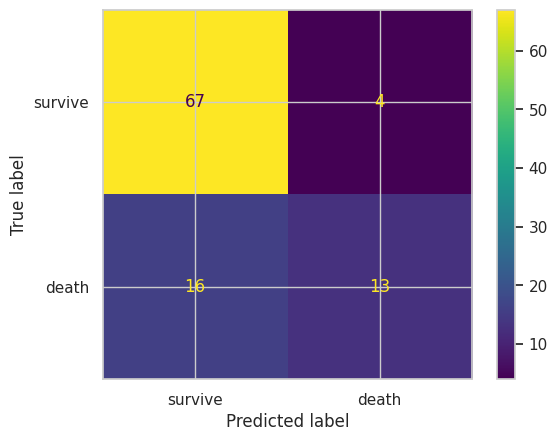

In [145]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['survive', "death"])

cmd.plot();

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.819


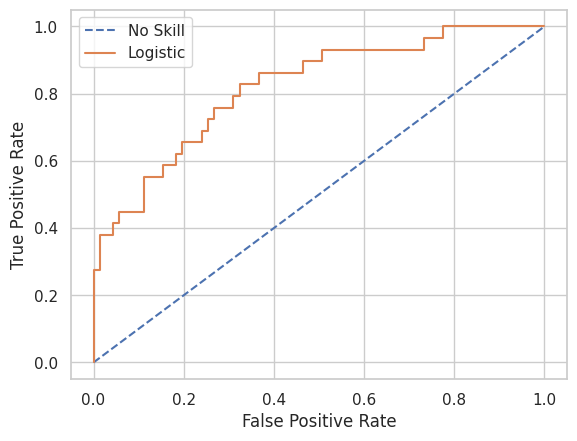

In [146]:
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y))]
# fit a model
lr_probs = best_model.predict_proba(X)
#rf_probs = rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
#rf_probs = rf_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y, ns_probs)
lr_auc = roc_auc_score(y, lr_probs)
#rf_auc = roc_auc_score(y_test, rf_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
#print('Rabdom Forest: ROC AUC=%.3f' % (rf_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y, lr_probs)
#rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, label='Logistic')
#pyplot.plot(rf_fpr, rf_tpr, label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Logistic: f1=0.565 auc=0.710


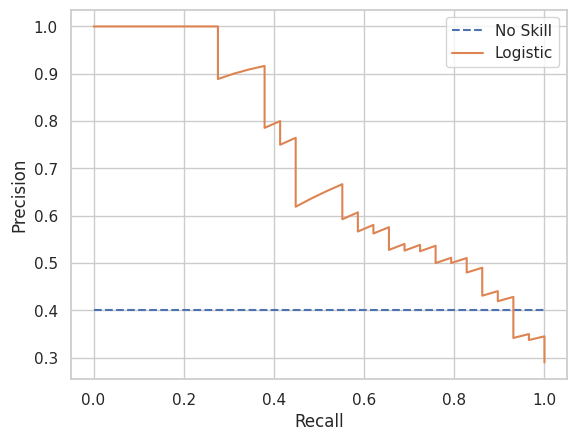

In [150]:
# precision-recall curve and f1
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

# predict probabilities
lr_probs = best_model.predict_proba(X)
#rf_probs = rf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
#rf_probs = rf_probs[:, 1]
# predict class values
yhat = best_model.predict(X)
#yhat_1 = rf.predict(X_train)

lr_precision, lr_recall, _ = precision_recall_curve(y, lr_probs)
#rf_precision, rf_recall, _ = precision_recall_curve(y_train, rf_probs)

lr_f1, lr_auc = f1_score(y, yhat), auc(lr_recall, lr_precision)
#rf_f1, rf_auc = f1_score(y_train, yhat_1), auc(rf_recall, rf_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
#print('Random Forest: f1=%.3f auc=%.3f' % (rf_f1, rf_auc))

# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, label='Logistic')
#pyplot.plot(rf_recall, rf_precision, label='Random Forest')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [152]:
! pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 4.6 MB/s eta 0:00:00


In [153]:
#https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137

import shap

explainer = shap.Explainer(best_model.predict, X)

shap_values = explainer(X)


PermutationExplainer explainer: 101it [00:32,  3.11it/s]


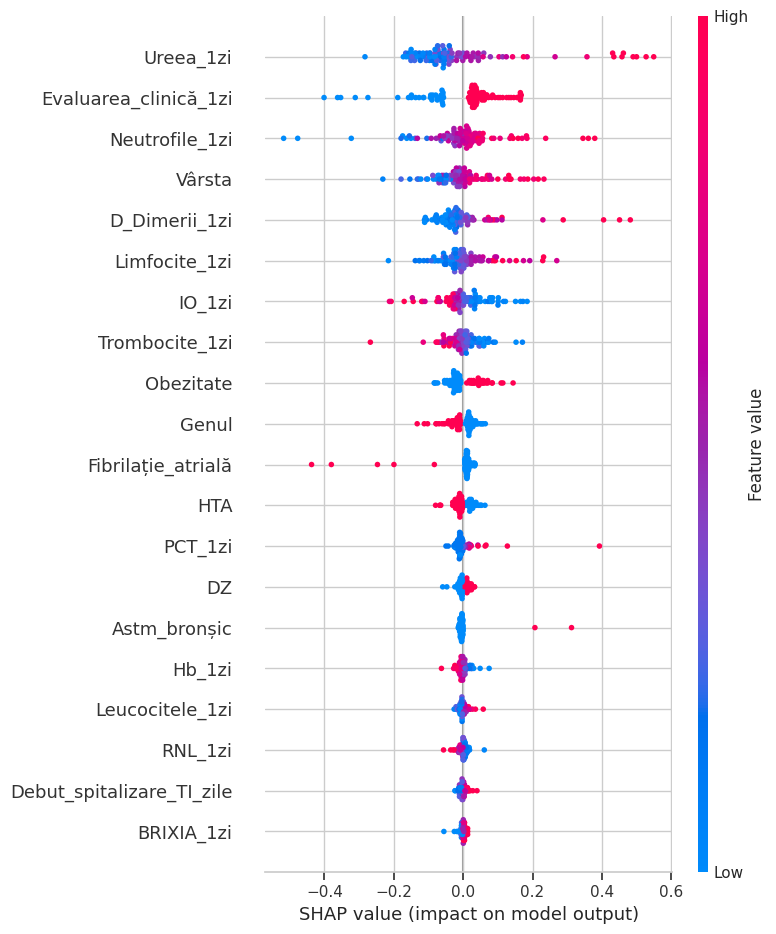

In [154]:
shap.summary_plot(shap_values);